
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend
## !pip install fastdtw



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

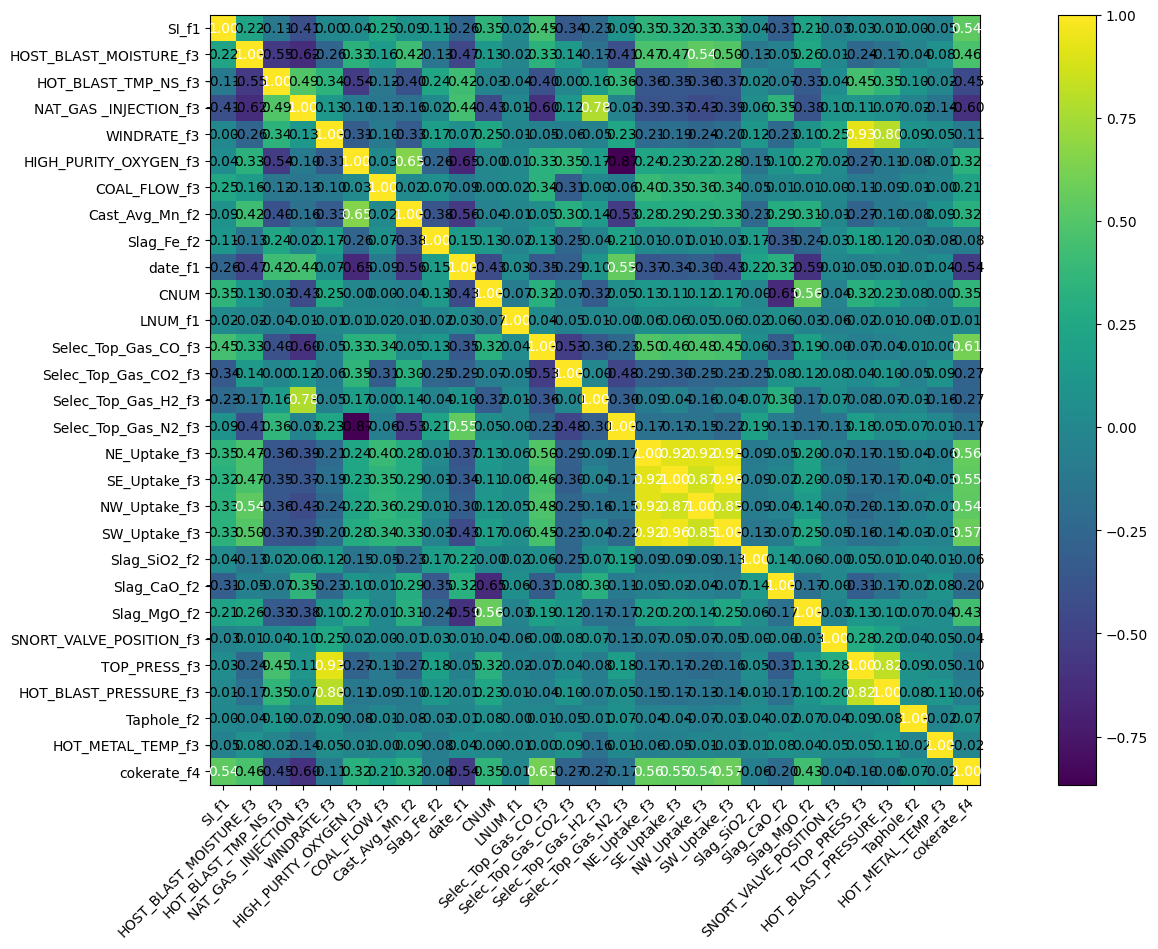

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

## tsDataWrangling_obj.read_UCI_data()


In [16]:

## tsDataWrangling_obj.UCI_Energy_data_df 


In [17]:

## tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

## tsDataWrangling_obj.UCI_Energy_data_df


In [19]:

## print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


In [20]:

## tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI','mov_avg_SI','SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3', 'COAL_FLOW_f3', 
                        'Cast_Avg_Mn_f2', 'Slag_Fe_f2',  'CNUM',  'Selec_Top_Gas_CO_f3',
                        'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 
                        'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 'Slag_SiO2_f2', 'Slag_CaO_f2', 
                        'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 'HOT_BLAST_PRESSURE_f3', 
                        'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

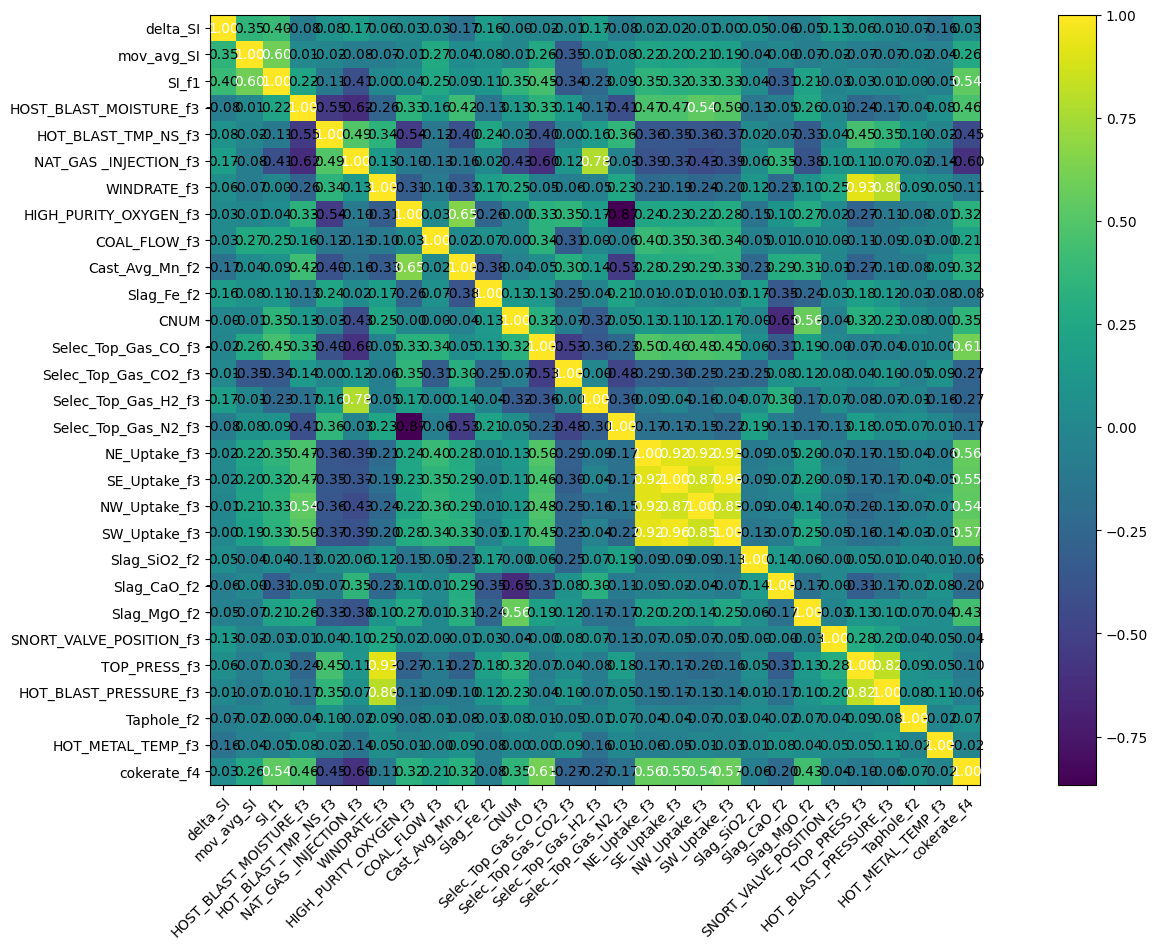

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        which_last = -1    ## -1 for 10, -3 for 8
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, which_last])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

inferenceGPT_obj.initialize_preds_lists()
inferenceGPT_obj.DPO_initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.305392
Loss_SI: 1.370421051979065 Loss_all: 1.2989566326141357
===
[50] Train Loss: 0.344099
Loss_SI: 0.500238835811615 Loss_all: 0.3354661166667938
===


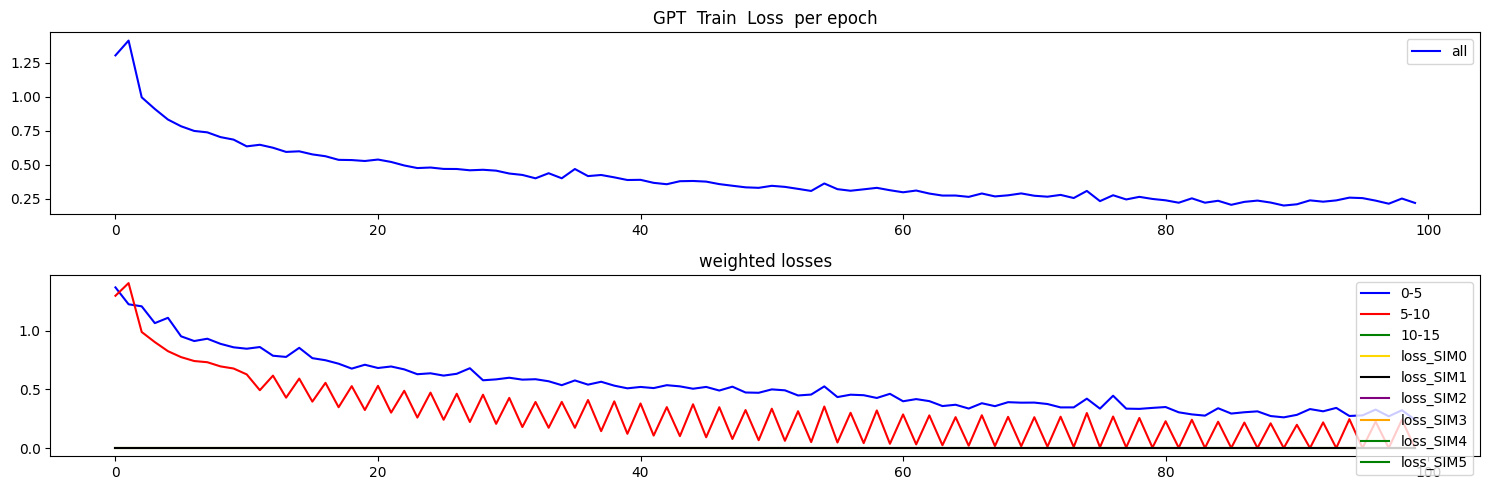

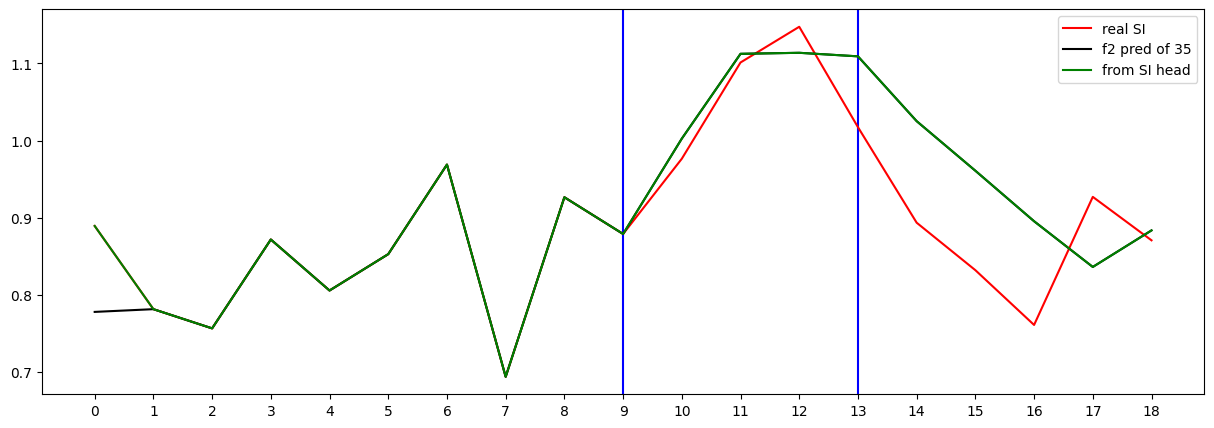

Testing R**2 - (all) - (no inputs):  0.9956681323232813
Testing R**2 - (f2) - SI full (no inputs):  -0.1390188605031888
Testing R**2 - SI head only (no inputs):  -0.1390188605031888
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  0.05376748901431205
1 ...index R**2 (no inputs):  -1.1354078039918711
2 ...index R**2 (no inputs):  -0.1390188605031888
3 ...index R**2 (no inputs):  -5.60207373783772
4 ...index R**2 (no inputs):  -2.369484903682824
5 ...index R**2 (no inputs):  -0.6290111576970556
6 ...index R**2 (no inputs):  -84.88469544438338
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

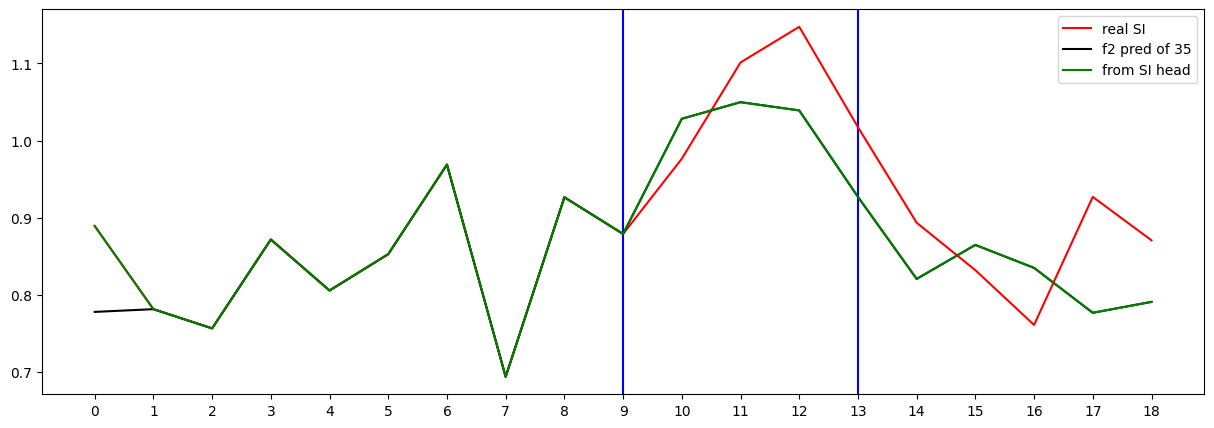

Testing R**2 - (all) - (no inputs):  0.9930919862220132
Testing R**2 - (f2) - SI full (no inputs):  0.5768137711601464
Testing R**2 - SI head only (no inputs):  0.5768137711601464
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  0.04988117623512167
1 ...index R**2 (no inputs):  -3.0215063683256522
2 ...index R**2 (no inputs):  0.5768137711601464
3 ...index R**2 (no inputs):  -11.590906752135968
4 ...index R**2 (no inputs):  -28.09653161061927
5 ...index R**2 (no inputs):  -1.6048156071167017
6 ...index R**2 (no inputs):  -275.7379127395086
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.236845
Loss_SI: 1.2719224691390991 Loss_all: 1.230269193649292
===
[50] Train Loss: 0.420761
Loss_SI: 0.6708316206932068 Loss_all: 0.41514864563941956
===


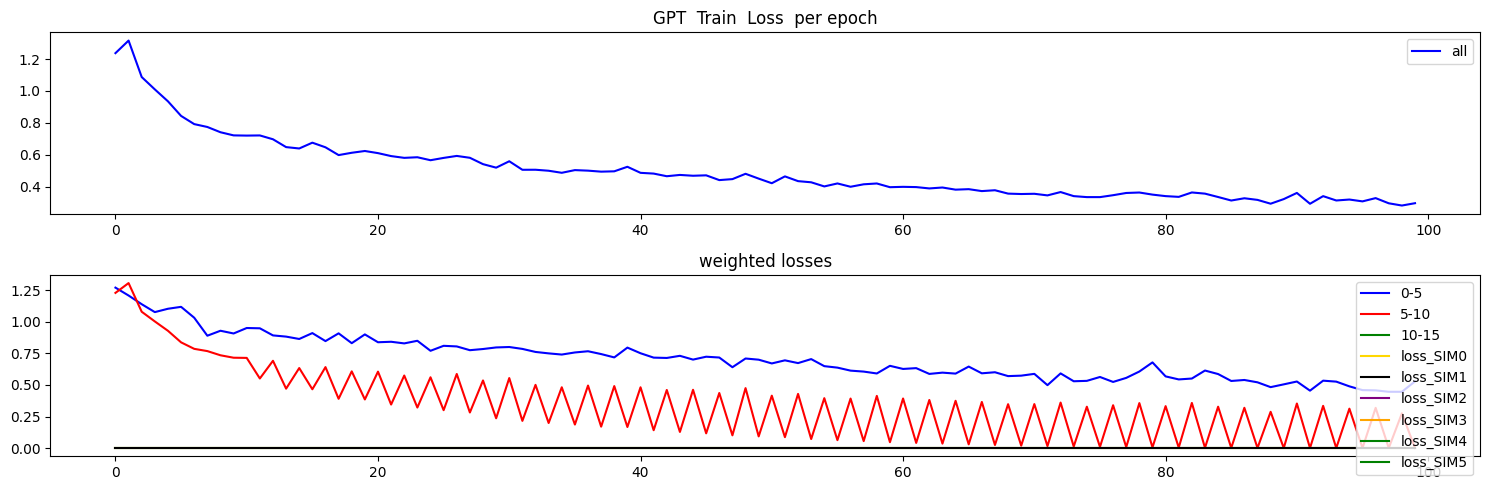

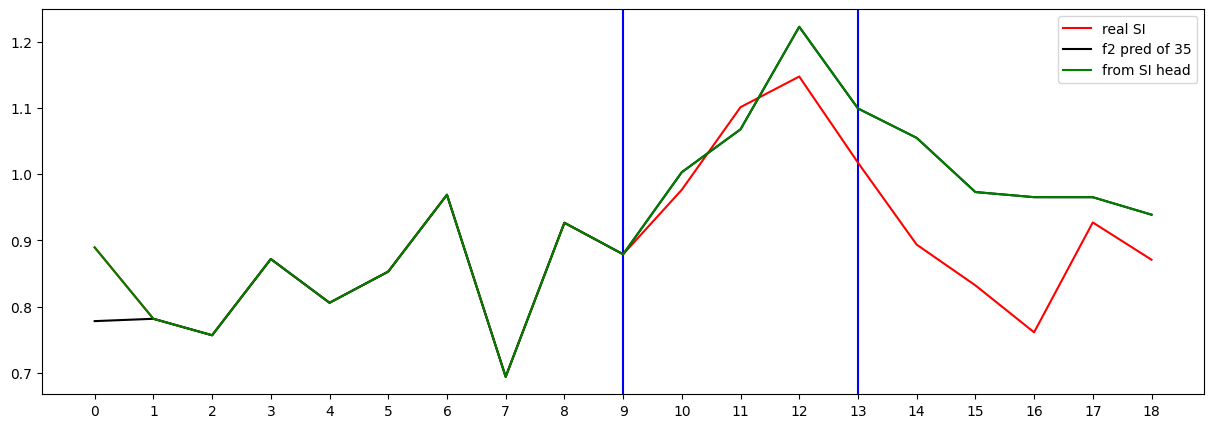

Testing R**2 - (all) - (no inputs):  0.9953929730106803
Testing R**2 - (f2) - SI full (no inputs):  -0.6192519789040152
Testing R**2 - SI head only (no inputs):  -0.6192519789040152
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  0.1509731084981879
1 ...index R**2 (no inputs):  -0.6324321383102451
2 ...index R**2 (no inputs):  -0.6192519789040152
3 ...index R**2 (no inputs):  -8.213596848991624
4 ...index R**2 (no inputs):  -2.5873672961245786
5 ...index R**2 (no inputs):  -0.710872398743833
6 ...index R**2 (no inputs):  -58.305310588988654
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

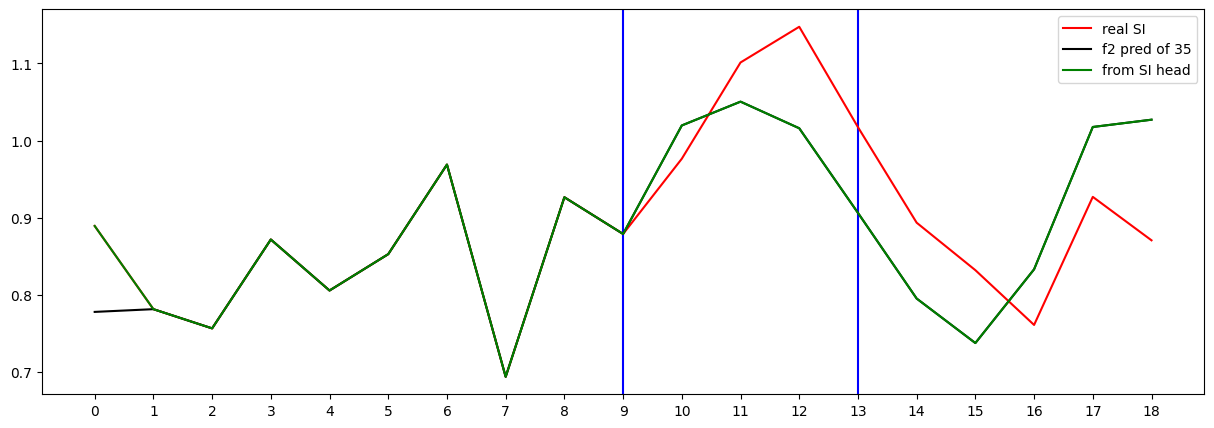

Testing R**2 - (all) - (no inputs):  0.9971820593753304
Testing R**2 - (f2) - SI full (no inputs):  0.4741115867274701
Testing R**2 - SI head only (no inputs):  0.4741115867274701
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  0.33898055165398644
1 ...index R**2 (no inputs):  -2.7717840817365023
2 ...index R**2 (no inputs):  0.4741115867274701
3 ...index R**2 (no inputs):  -6.5628819092637185
4 ...index R**2 (no inputs):  -81.35784312827612
5 ...index R**2 (no inputs):  -0.04759131532961436
6 ...index R**2 (no inputs):  -271.48429402405736
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.138184
Loss_SI: 1.1053154468536377 Loss_all: 1.1317789554595947
===
[50] Train Loss: 0.405244
Loss_SI: 0.6336256861686707 Loss_all: 0.4001831114292145
===


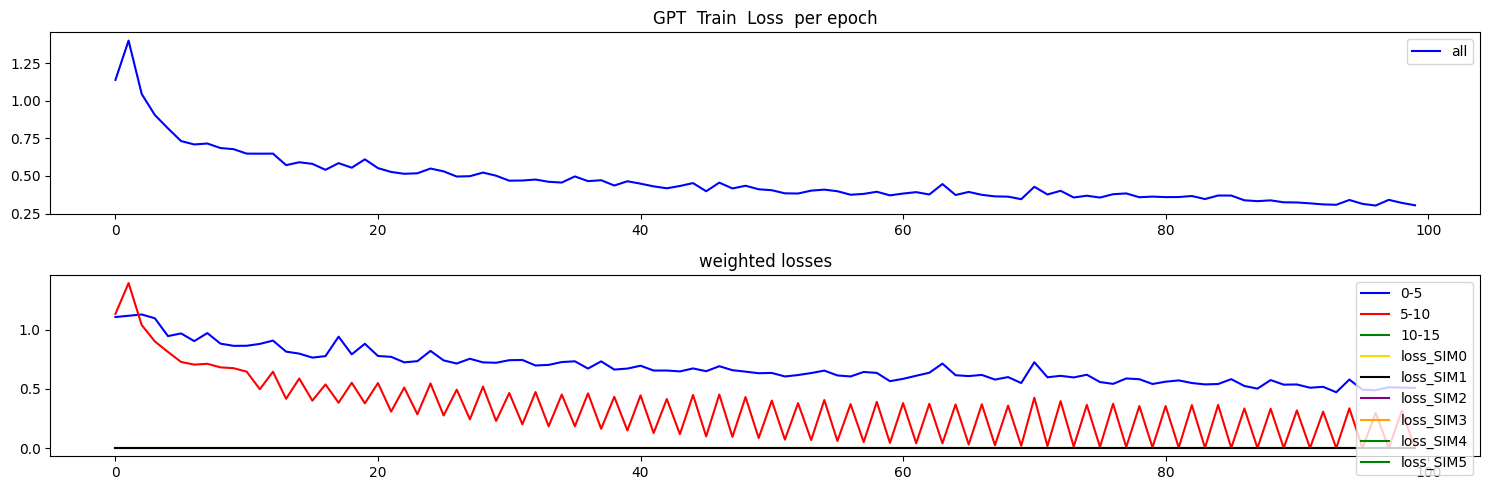

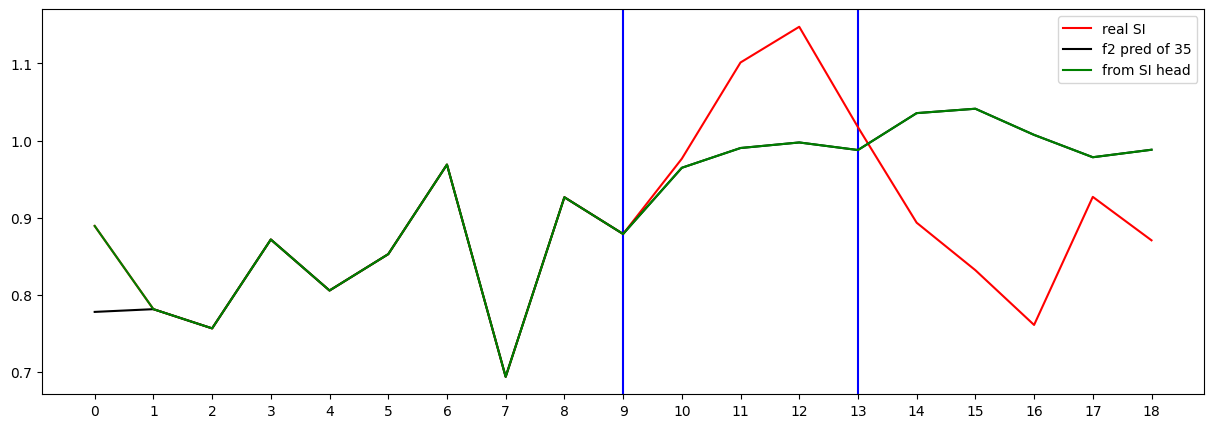

Testing R**2 - (all) - (no inputs):  0.9947670512954571
Testing R**2 - (f2) - SI full (no inputs):  -0.560816696467892
Testing R**2 - SI head only (no inputs):  -0.560816696467892
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  -0.07793422127396821
1 ...index R**2 (no inputs):  -0.624305072747503
2 ...index R**2 (no inputs):  -0.560816696467892
3 ...index R**2 (no inputs):  -3.5347557509583254
4 ...index R**2 (no inputs):  -5.111033541670101
5 ...index R**2 (no inputs):  -0.9533885674467653
6 ...index R**2 (no inputs):  -332.6426557074834
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

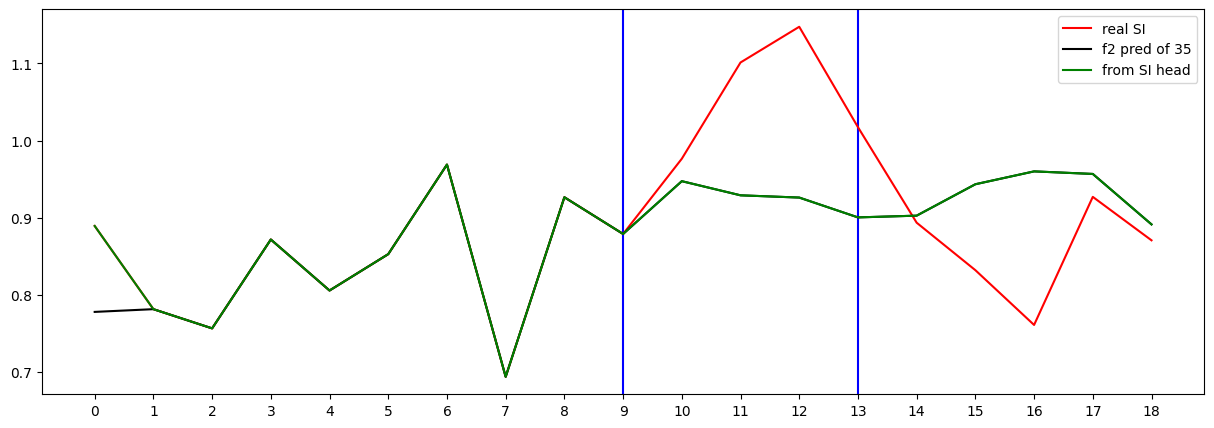

Testing R**2 - (all) - (no inputs):  0.9963337969780167
Testing R**2 - (f2) - SI full (no inputs):  0.014482488167913199
Testing R**2 - SI head only (no inputs):  0.014482488167913199
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  -0.038673129289684915
1 ...index R**2 (no inputs):  -0.8891112347616723
2 ...index R**2 (no inputs):  0.014482488167913199
3 ...index R**2 (no inputs):  -7.057587840116977
4 ...index R**2 (no inputs):  -1.070006017773082
5 ...index R**2 (no inputs):  -0.3485936032793533
6 ...index R**2 (no inputs):  -42.005614849692826
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ..

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.492653
Loss_SI: 1.6896921396255493 Loss_all: 1.4856873750686646
===
[50] Train Loss: 0.452800
Loss_SI: 0.642798662185669 Loss_all: 0.4474252760410309
===


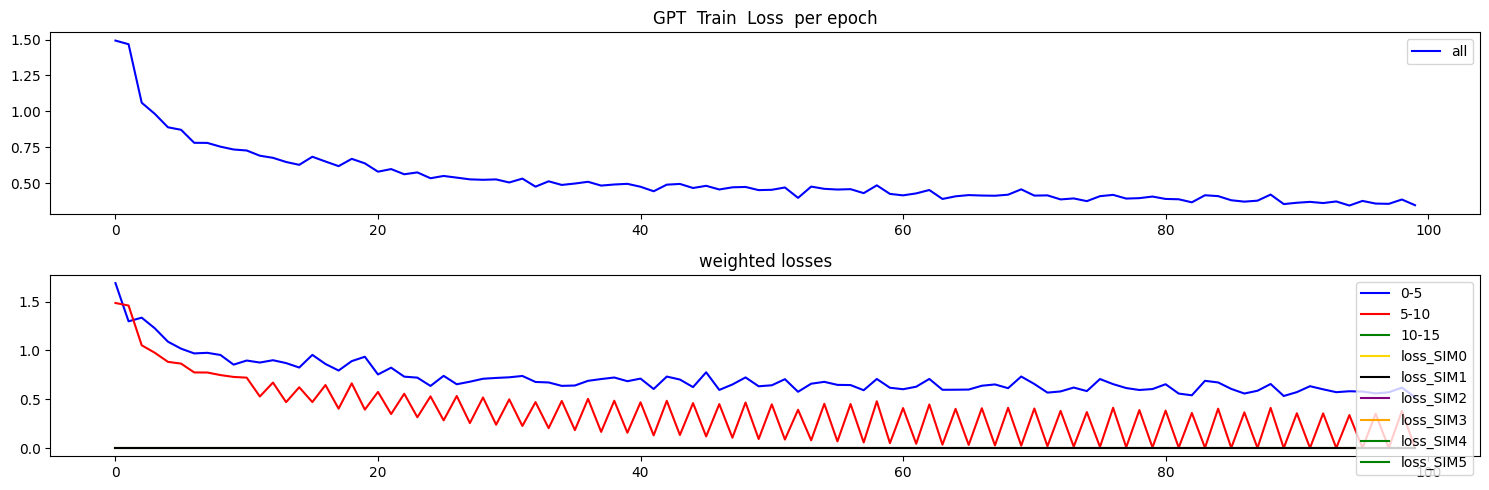

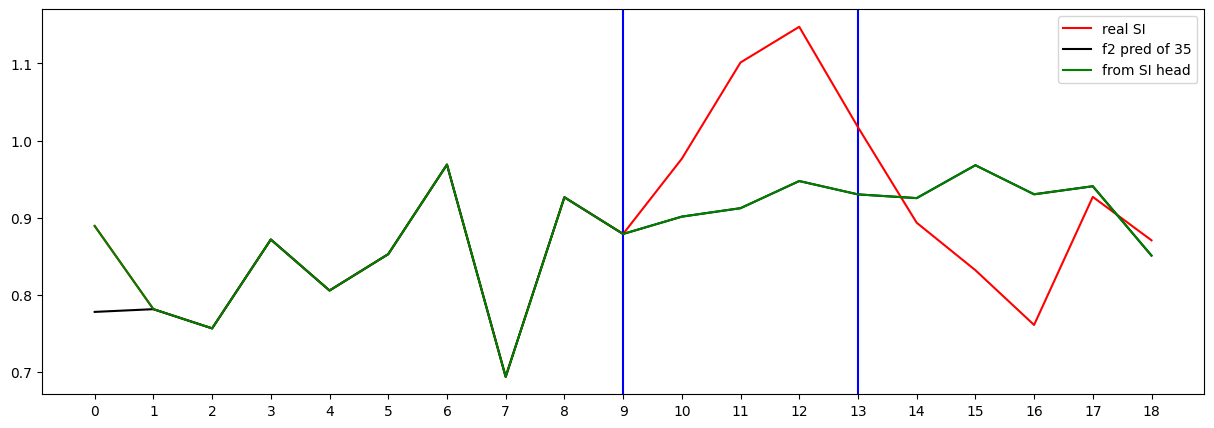

Testing R**2 - (all) - (no inputs):  0.9967198094227973
Testing R**2 - (f2) - SI full (no inputs):  -0.24173285574351389
Testing R**2 - SI head only (no inputs):  -0.24173285574351389
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  -0.29289474650443625
1 ...index R**2 (no inputs):  -0.7484584910617094
2 ...index R**2 (no inputs):  -0.24173285574351389
3 ...index R**2 (no inputs):  -5.593214532815929
4 ...index R**2 (no inputs):  -2.8768444366144053
5 ...index R**2 (no inputs):  -0.20508652584020415
6 ...index R**2 (no inputs):  -50.043597777641736
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 .

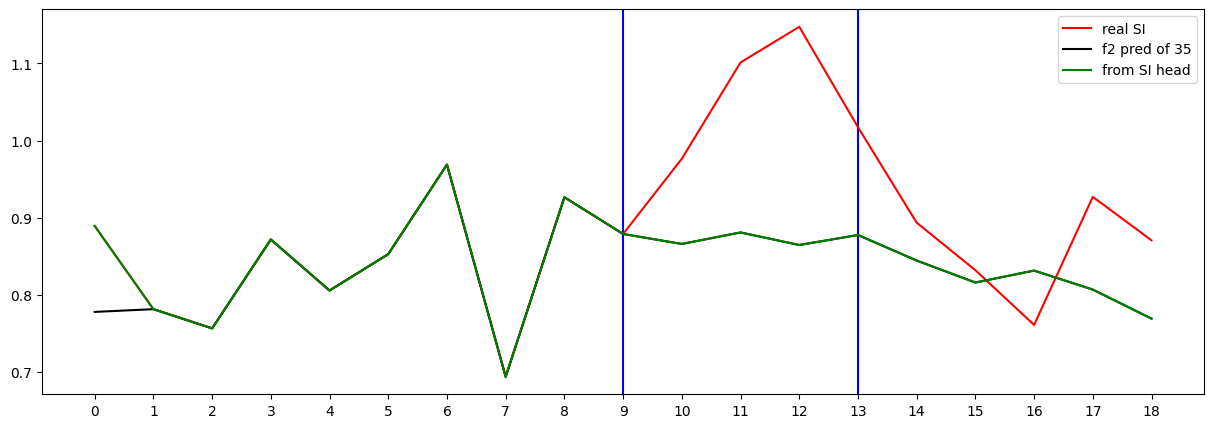

Testing R**2 - (all) - (no inputs):  0.9961925556429847
Testing R**2 - (f2) - SI full (no inputs):  -0.4081829580577887
Testing R**2 - SI head only (no inputs):  -0.4081829580577887
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  -0.005274615379856851
1 ...index R**2 (no inputs):  -0.46865675591527167
2 ...index R**2 (no inputs):  -0.4081829580577887
3 ...index R**2 (no inputs):  -8.04271138532857
4 ...index R**2 (no inputs):  -8.714547390911104
5 ...index R**2 (no inputs):  -0.360600798303905
6 ...index R**2 (no inputs):  -86.3071487791495
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.200815
Loss_SI: 1.1527661085128784 Loss_all: 1.1942756175994873
===
[50] Train Loss: 0.461679
Loss_SI: 0.6527504324913025 Loss_all: 0.4577234387397766
===


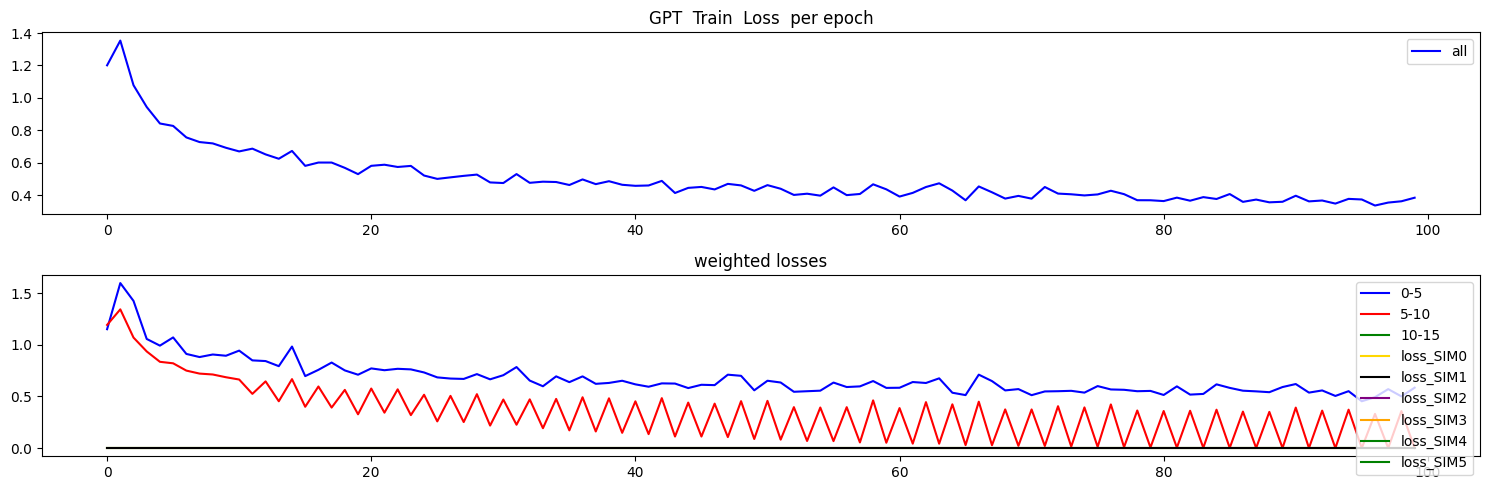

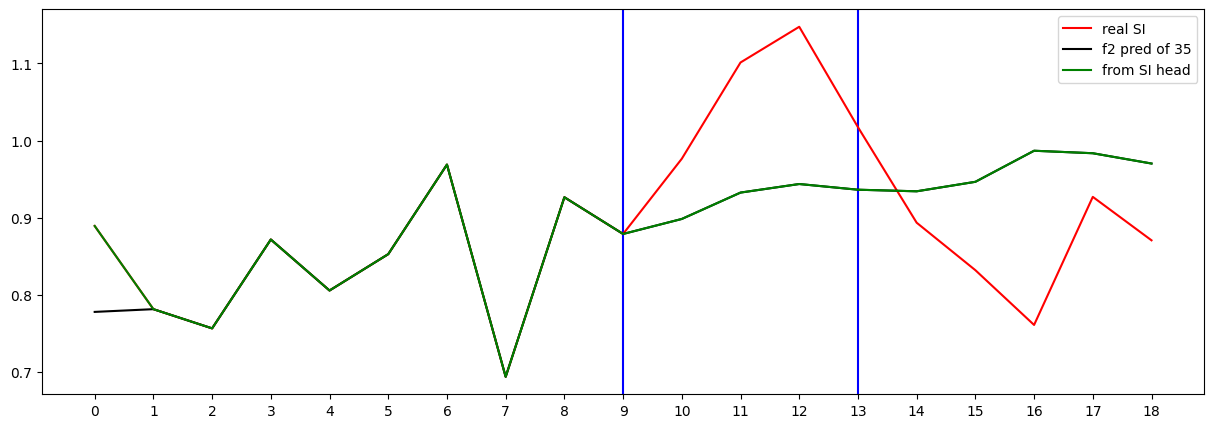

Testing R**2 - (all) - (no inputs):  0.9969638172153618
Testing R**2 - (f2) - SI full (no inputs):  -0.2643314636745073
Testing R**2 - SI head only (no inputs):  -0.2643314636745073
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  -0.07526875673981315
1 ...index R**2 (no inputs):  -0.31772880963734695
2 ...index R**2 (no inputs):  -0.2643314636745073
3 ...index R**2 (no inputs):  -0.1692178648605971
4 ...index R**2 (no inputs):  -5.4627682334057
5 ...index R**2 (no inputs):  -0.11021217921197968
6 ...index R**2 (no inputs):  -61.12061373731989
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...ind

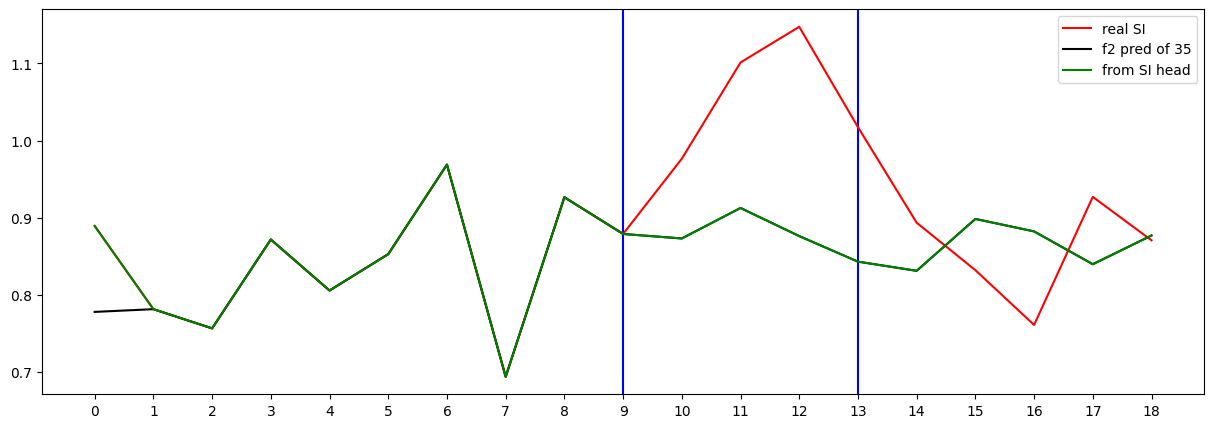

Testing R**2 - (all) - (no inputs):  0.9929908571237251
Testing R**2 - (f2) - SI full (no inputs):  -0.1814774028640178
Testing R**2 - SI head only (no inputs):  -0.1814774028640178
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0403567273590473
3 ...t step R**2 (no inputs):  -0.8919934957697382
4 ...t step R**2 (no inputs):  -1.4852584953818098
5 ...t step R**2 (no inputs):  -1.2113308925476005
6 ...t step R**2 (no inputs):  -0.15747608445364092
7 ...t step R**2 (no inputs):  -1.3057853096421401
8 ...t step R**2 (no inputs):  -1.8376278752823132
0 ...index R**2 (no inputs):  -0.3817326458086745
1 ...index R**2 (no inputs):  -0.5017454443285794
2 ...index R**2 (no inputs):  -0.1814774028640178
3 ...index R**2 (no inputs):  -3.045053906615042
4 ...index R**2 (no inputs):  -8.184631571197047
5 ...index R**2 (no inputs):  -1.5846897150293149
6 ...index R**2 (no inputs):  -761.7343659030138
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.218760
Loss_SI: 1.2871406078338623 Loss_all: 1.2125164270401
===
[50] Train Loss: 0.347212
Loss_SI: 0.6392965316772461 Loss_all: 0.34086155891418457
===


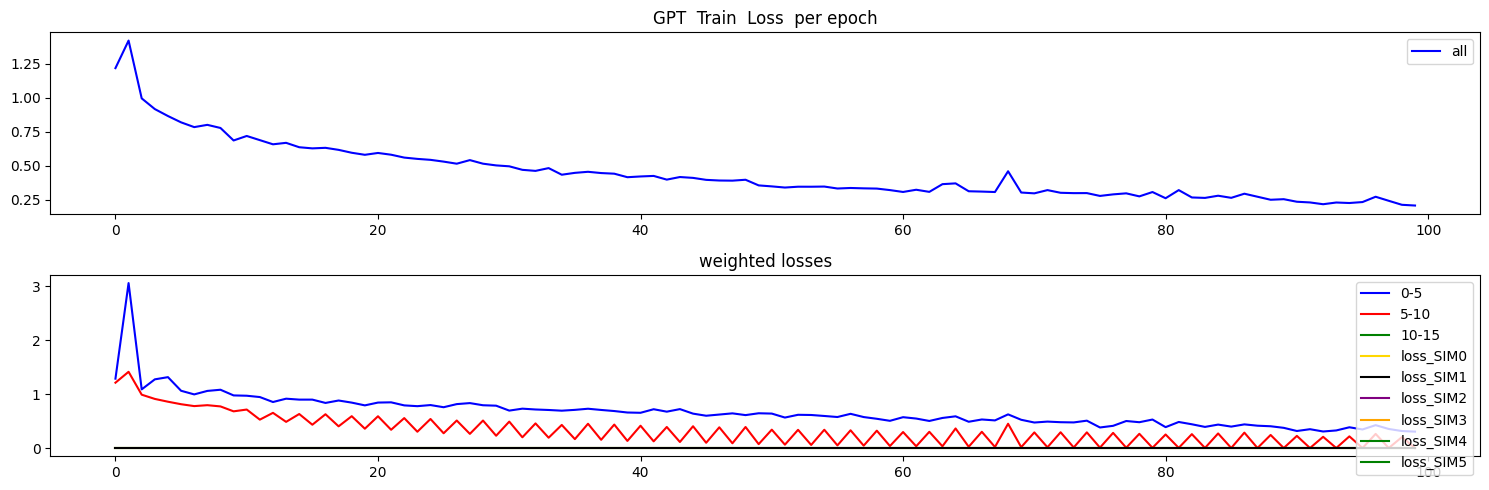

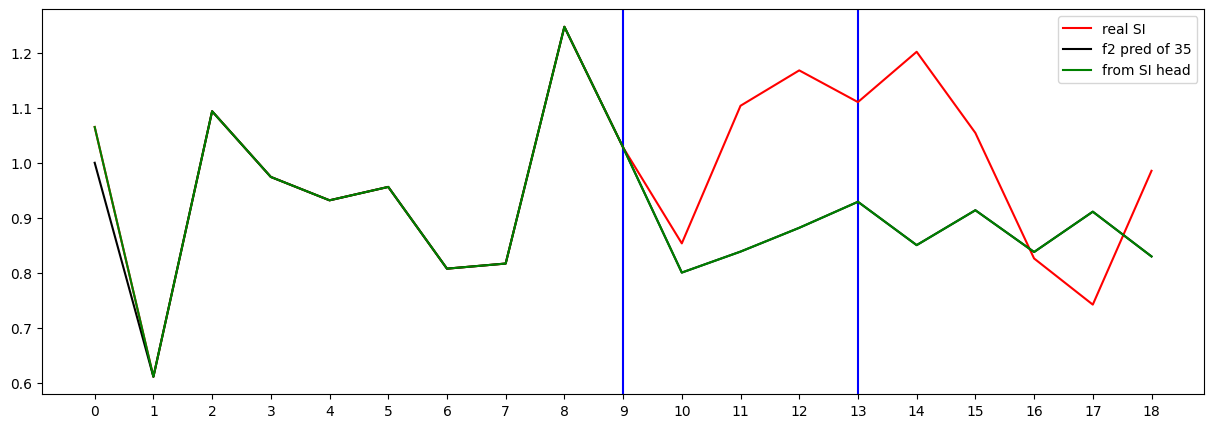

Testing R**2 - (all) - (no inputs):  0.9822543937808934
Testing R**2 - (f2) - SI full (no inputs):  -1.3664999730947307
Testing R**2 - SI head only (no inputs):  -1.3664999730947307
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.2993297236084906
3 ...t step R**2 (no inputs):  -2.1534151147658345
4 ...t step R**2 (no inputs):  -2.1396670072881783
5 ...t step R**2 (no inputs):  -2.088947383368159
6 ...t step R**2 (no inputs):  -2.0404421133783734
7 ...t step R**2 (no inputs):  -1.928762725630183
8 ...t step R**2 (no inputs):  -1.3432417030772448
0 ...index R**2 (no inputs):  -0.5648210800799784
1 ...index R**2 (no inputs):  -1.3038643707207584
2 ...index R**2 (no inputs):  -1.3664999730947307
3 ...index R**2 (no inputs):  -366.2834712338624
4 ...index R**2 (no inputs):  0.2654999339920362
5 ...index R**2 (no inputs):  -0.22357950169397434
6 ...index R**2 (no inputs):  -11.290779204763066
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

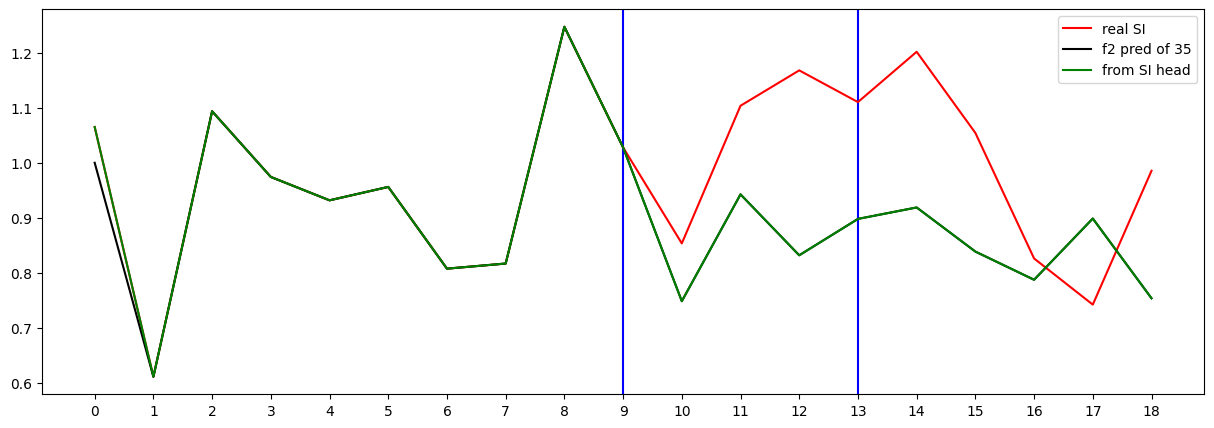

Testing R**2 - (all) - (no inputs):  0.98393534264638
Testing R**2 - (f2) - SI full (no inputs):  -1.5015693807036508
Testing R**2 - SI head only (no inputs):  -1.5015693807036508
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.2993297236084906
3 ...t step R**2 (no inputs):  -2.1534151147658345
4 ...t step R**2 (no inputs):  -2.1396670072881783
5 ...t step R**2 (no inputs):  -2.088947383368159
6 ...t step R**2 (no inputs):  -2.0404421133783734
7 ...t step R**2 (no inputs):  -1.928762725630183
8 ...t step R**2 (no inputs):  -1.3432417030772448
0 ...index R**2 (no inputs):  -0.584239228183929
1 ...index R**2 (no inputs):  -1.7354471067554345
2 ...index R**2 (no inputs):  -1.5015693807036508
3 ...index R**2 (no inputs):  -568.4638708321846
4 ...index R**2 (no inputs):  -0.07338476386524495
5 ...index R**2 (no inputs):  -0.10687959088481902
6 ...index R**2 (no inputs):  -349.7057834089711
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R*

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.204396
Loss_SI: 1.1053985357284546 Loss_all: 1.1979564428329468
===
[50] Train Loss: 0.408486
Loss_SI: 0.6357592940330505 Loss_all: 0.4044903814792633
===


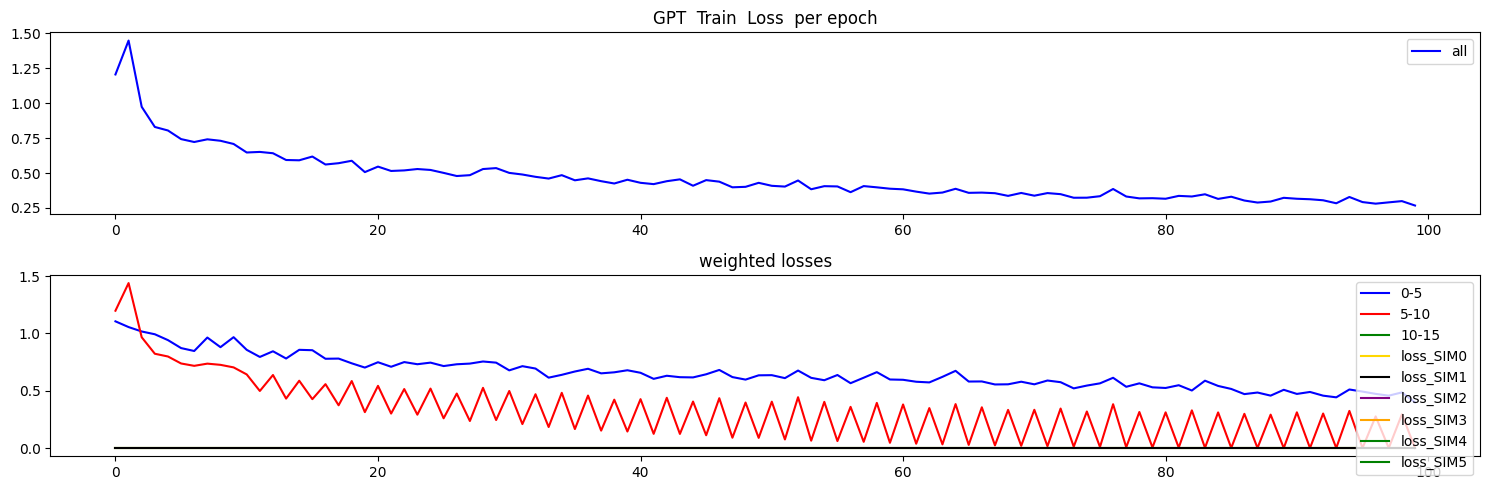

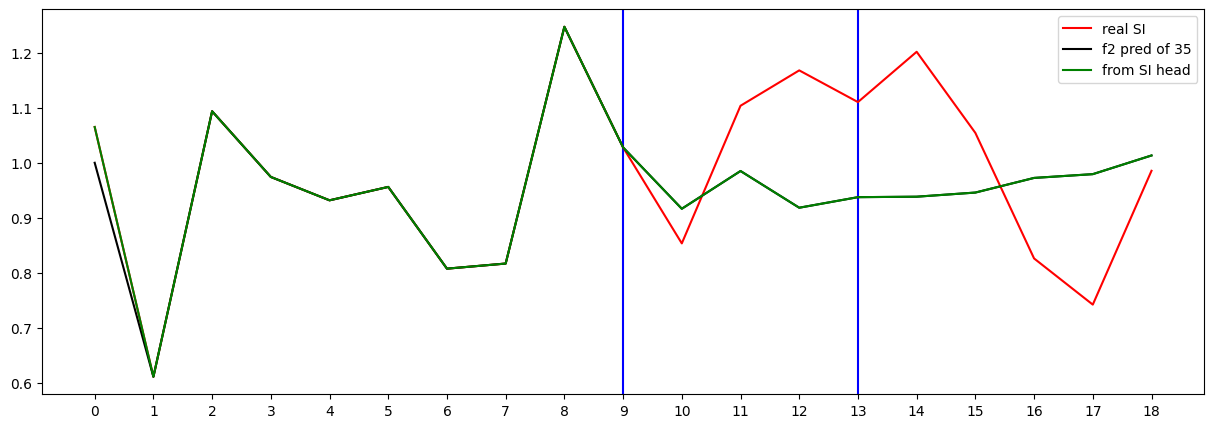

Testing R**2 - (all) - (no inputs):  0.987712075583731
Testing R**2 - (f2) - SI full (no inputs):  -0.3718877391777935
Testing R**2 - SI head only (no inputs):  -0.3718877391777935
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  -0.06189678636947704
1 ...index R**2 (no inputs):  -0.3847263328246846
2 ...index R**2 (no inputs):  -0.3718877391777935
3 ...index R**2 (no inputs):  -512.096947513075
4 ...index R**2 (no inputs):  -1.4829751459993488
5 ...index R**2 (no inputs):  0.1574637519459804
6 ...index R**2 (no inputs):  -179.73115715497948
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 

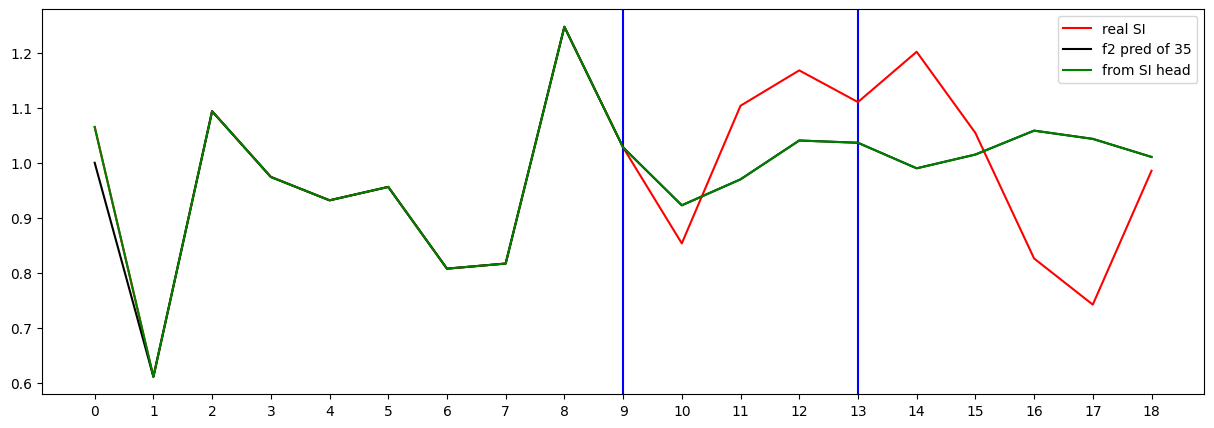

Testing R**2 - (all) - (no inputs):  0.9705210011252211
Testing R**2 - (f2) - SI full (no inputs):  -0.32716980434480414
Testing R**2 - SI head only (no inputs):  -0.32716980434480414
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  -0.685895315981434
1 ...index R**2 (no inputs):  -0.17570054794175527
2 ...index R**2 (no inputs):  -0.32716980434480414
3 ...index R**2 (no inputs):  -225.20467509198212
4 ...index R**2 (no inputs):  -2.3974477804571555
5 ...index R**2 (no inputs):  -1.026169966470286
6 ...index R**2 (no inputs):  -1217.948207588574
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.391315
Loss_SI: 1.5280845165252686 Loss_all: 1.3848031759262085
===
[50] Train Loss: 0.402390
Loss_SI: 0.5932556986808777 Loss_all: 0.39684468507766724
===


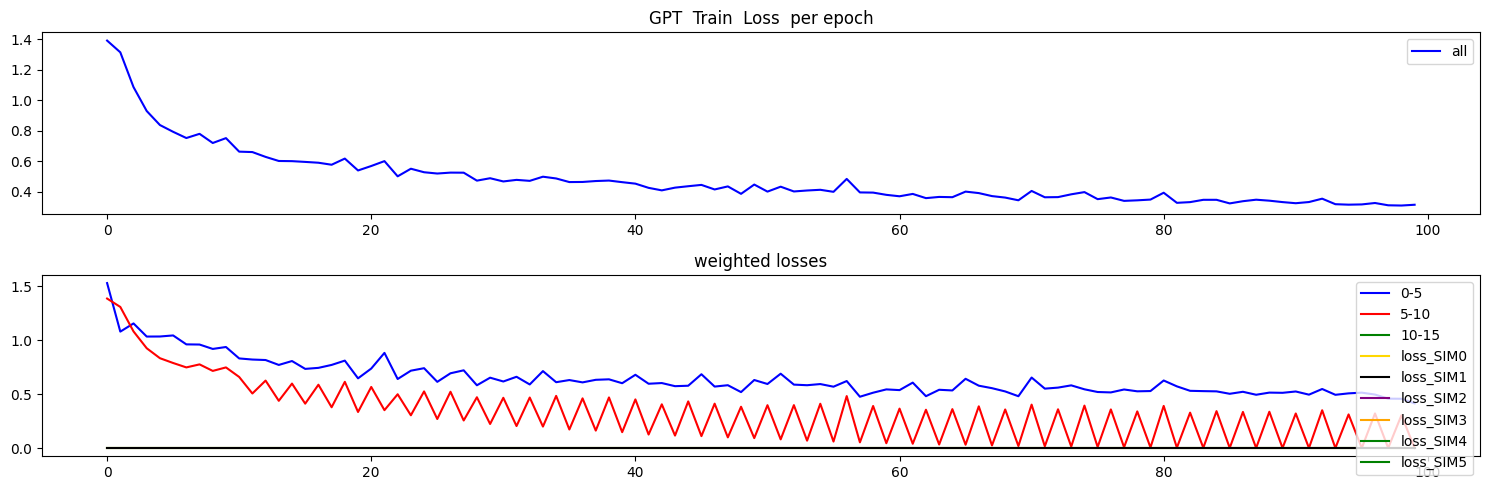

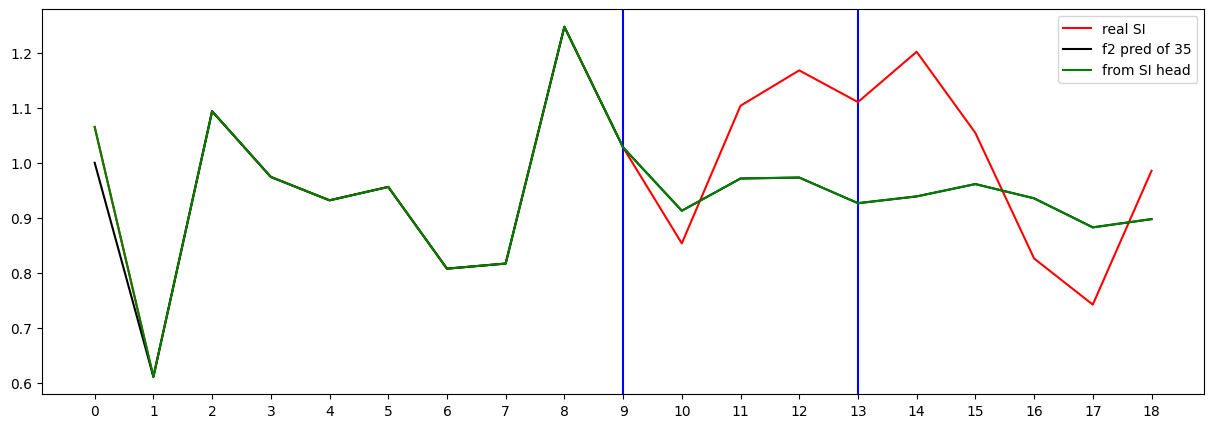

Testing R**2 - (all) - (no inputs):  0.981009790884676
Testing R**2 - (f2) - SI full (no inputs):  -0.4693083817986783
Testing R**2 - SI head only (no inputs):  -0.4693083817986783
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  0.08248200320054888
1 ...index R**2 (no inputs):  -0.6135180743684223
2 ...index R**2 (no inputs):  -0.4693083817986783
3 ...index R**2 (no inputs):  -174.15317930203847
4 ...index R**2 (no inputs):  -2.319531273617675
5 ...index R**2 (no inputs):  -0.3089430447340775
6 ...index R**2 (no inputs):  -98.75475029923882
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 

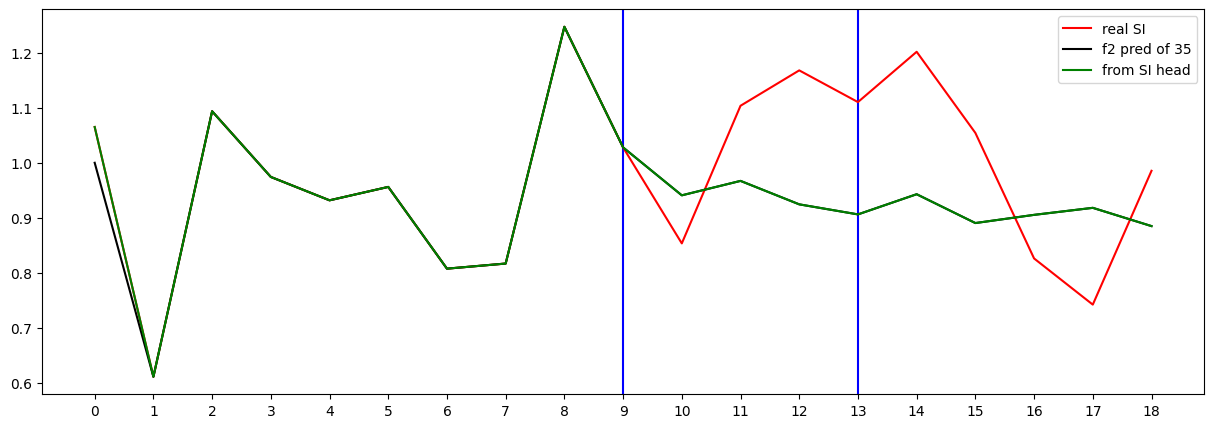

Testing R**2 - (all) - (no inputs):  0.980923688934732
Testing R**2 - (f2) - SI full (no inputs):  -0.4259782429149821
Testing R**2 - SI head only (no inputs):  -0.4259782429149821
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  0.16328954291193243
1 ...index R**2 (no inputs):  -0.190819584102357
2 ...index R**2 (no inputs):  -0.4259782429149821
3 ...index R**2 (no inputs):  -125.090732692003
4 ...index R**2 (no inputs):  -1.45344974281551
5 ...index R**2 (no inputs):  -0.31332561735925313
6 ...index R**2 (no inputs):  -281.6221373428791
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.252820
Loss_SI: 1.3502987623214722 Loss_all: 1.246556282043457
===
[50] Train Loss: 0.424980
Loss_SI: 0.6139136552810669 Loss_all: 0.41946277022361755
===


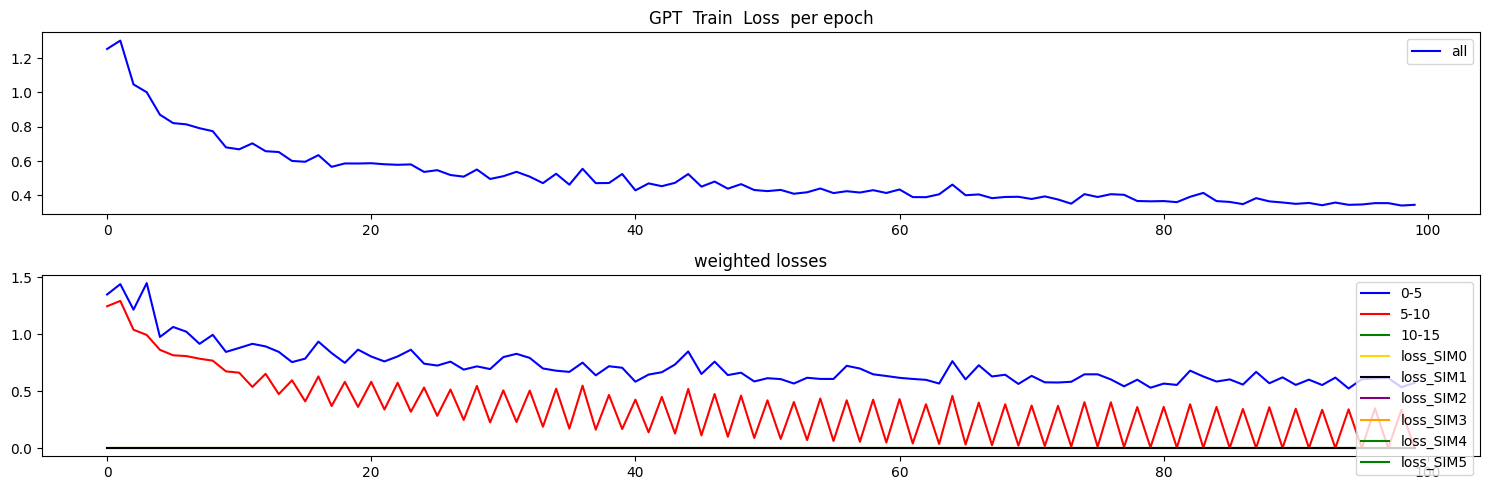

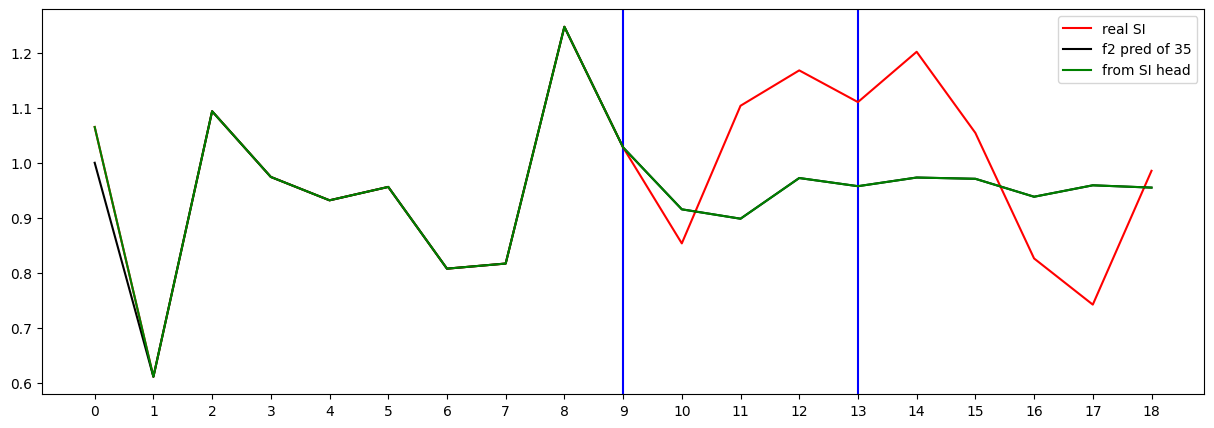

Testing R**2 - (all) - (no inputs):  0.9825971511811116
Testing R**2 - (f2) - SI full (no inputs):  -0.40873777754620866
Testing R**2 - SI head only (no inputs):  -0.40873777754620866
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  -0.12357566821232213
1 ...index R**2 (no inputs):  -0.29613565413356846
2 ...index R**2 (no inputs):  -0.40873777754620866
3 ...index R**2 (no inputs):  -135.63380557721547
4 ...index R**2 (no inputs):  -3.6017154474534596
5 ...index R**2 (no inputs):  -0.20023525934263398
6 ...index R**2 (no inputs):  -27.58321644487084
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...ind

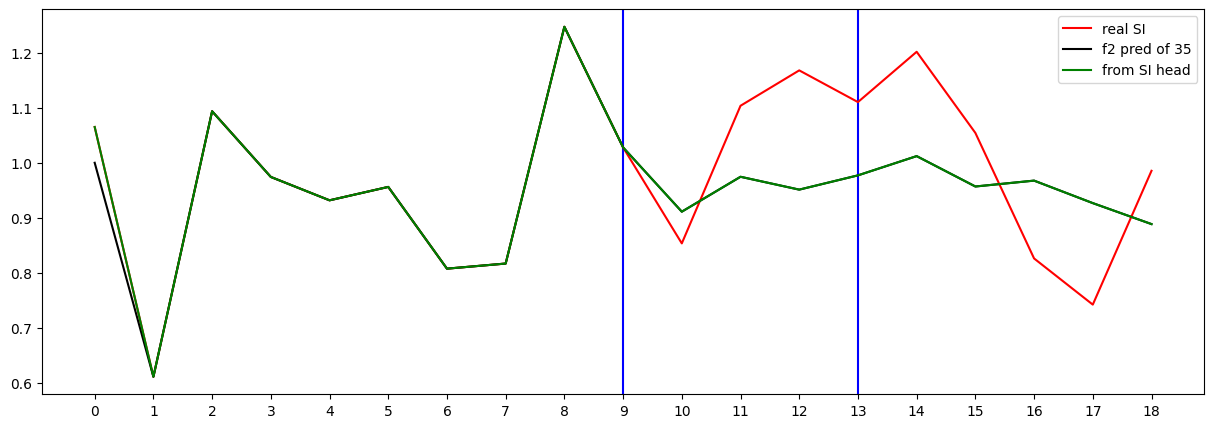

Testing R**2 - (all) - (no inputs):  0.9851258882172755
Testing R**2 - (f2) - SI full (no inputs):  -0.34957644656485254
Testing R**2 - SI head only (no inputs):  -0.34957644656485254
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  -0.07142676659951097
1 ...index R**2 (no inputs):  -0.4752175587450338
2 ...index R**2 (no inputs):  -0.34957644656485254
3 ...index R**2 (no inputs):  -565.2476585523481
4 ...index R**2 (no inputs):  -10.328524848678876
5 ...index R**2 (no inputs):  -0.023648701869410038
6 ...index R**2 (no inputs):  -39.80233661832751
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...inde

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )



[0] Train Loss: 1.162206
Loss_SI: 1.1086921691894531 Loss_all: 1.1557598114013672
===
[50] Train Loss: 0.373535
Loss_SI: 0.5067257881164551 Loss_all: 0.36961692571640015
===


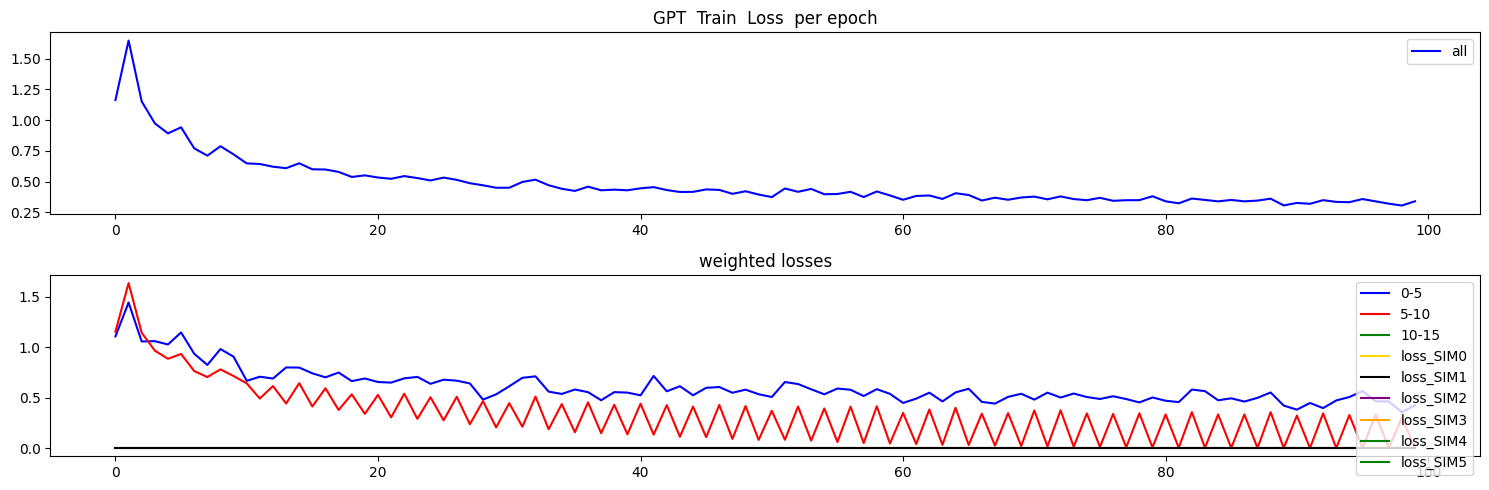

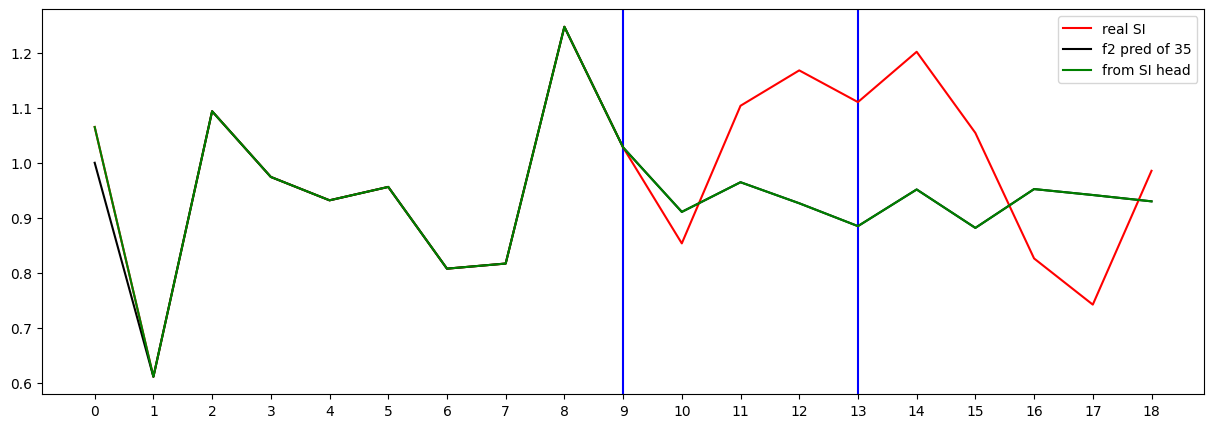

Testing R**2 - (all) - (no inputs):  0.9856602810112152
Testing R**2 - (f2) - SI full (no inputs):  -0.5416471722315435
Testing R**2 - SI head only (no inputs):  -0.5416471722315435
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  -0.2637696137996137
1 ...index R**2 (no inputs):  -0.6709776786767796
2 ...index R**2 (no inputs):  -0.5416471722315435
3 ...index R**2 (no inputs):  -594.000080284367
4 ...index R**2 (no inputs):  -28.84947252686516
5 ...index R**2 (no inputs):  0.014111710068280825
6 ...index R**2 (no inputs):  -18.610486215653395
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2

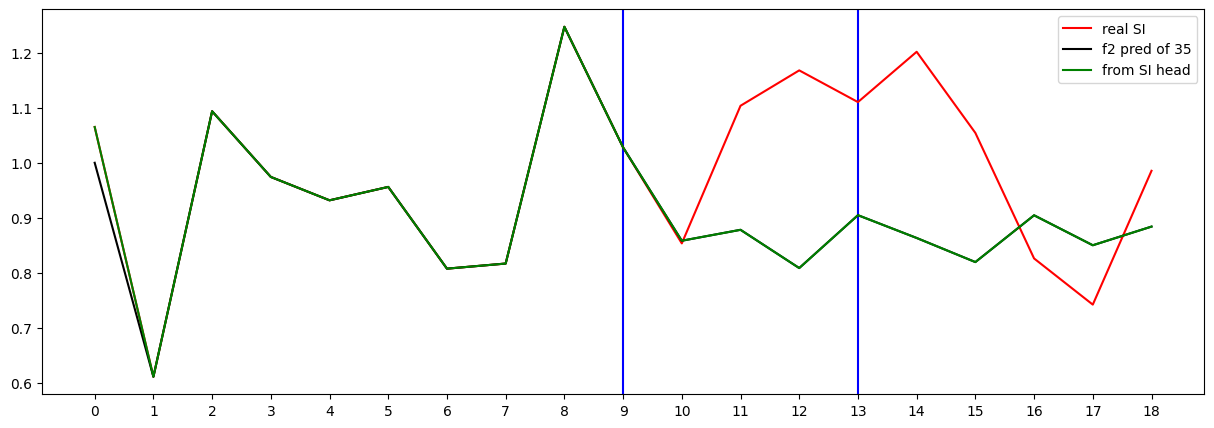

Testing R**2 - (all) - (no inputs):  0.9818858684871632
Testing R**2 - (f2) - SI full (no inputs):  -1.3188576117115645
Testing R**2 - SI head only (no inputs):  -1.3188576117115645
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -2.299329672288492
3 ...t step R**2 (no inputs):  -2.153415033079594
4 ...t step R**2 (no inputs):  -2.139667106472262
5 ...t step R**2 (no inputs):  -2.0889474662560317
6 ...t step R**2 (no inputs):  -2.04044217772558
7 ...t step R**2 (no inputs):  -1.9287626078466875
8 ...t step R**2 (no inputs):  -1.3432416375681786
0 ...index R**2 (no inputs):  -0.528961139617123
1 ...index R**2 (no inputs):  -0.7293986828248986
2 ...index R**2 (no inputs):  -1.3188576117115645
3 ...index R**2 (no inputs):  -894.6387136722542
4 ...index R**2 (no inputs):  -153.4211980053619
5 ...index R**2 (no inputs):  -0.24087787794368198
6 ...index R**2 (no inputs):  -19.780632194757313
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.227327
Loss_SI: 1.3029042482376099 Loss_all: 1.220503330230713
===
[50] Train Loss: 0.409068
Loss_SI: 0.6478443145751953 Loss_all: 0.4030025005340576
===


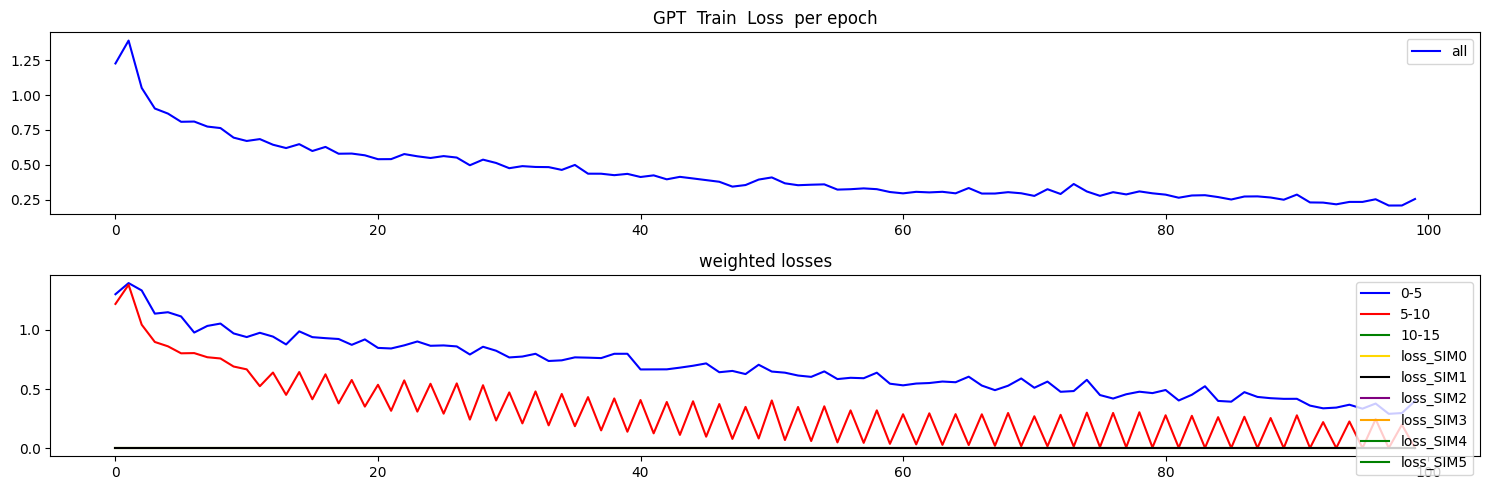

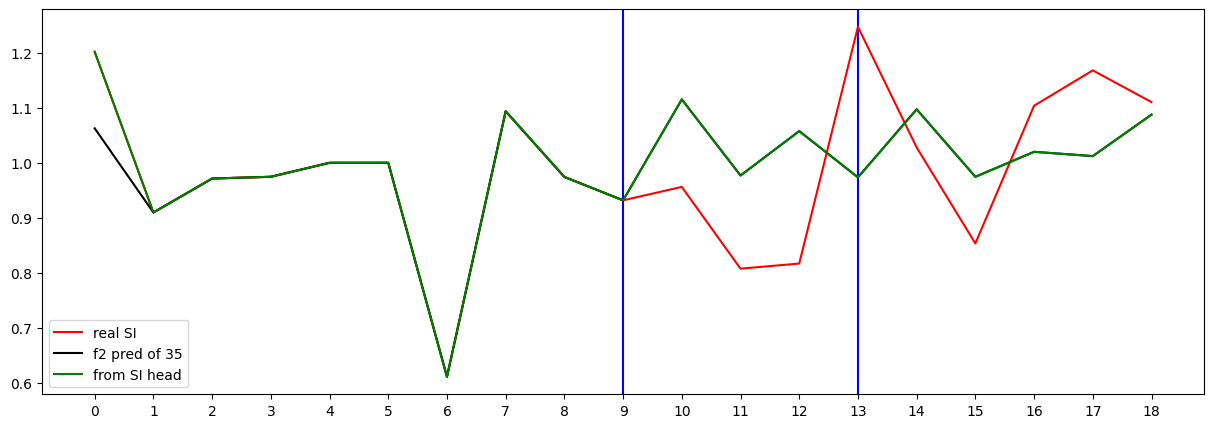

Testing R**2 - (all) - (no inputs):  0.9967711914163502
Testing R**2 - (f2) - SI full (no inputs):  -0.20036030849704312
Testing R**2 - SI head only (no inputs):  -0.20036030849704312
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.13281671314368126
1 ...index R**2 (no inputs):  -0.10995183932741304
2 ...index R**2 (no inputs):  -0.20036030849704312
3 ...index R**2 (no inputs):  -34.63539459263937
4 ...index R**2 (no inputs):  -0.7403877198440318
5 ...index R**2 (no inputs):  -0.8576171196664695
6 ...index R**2 (no inputs):  -41.3340969544797
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

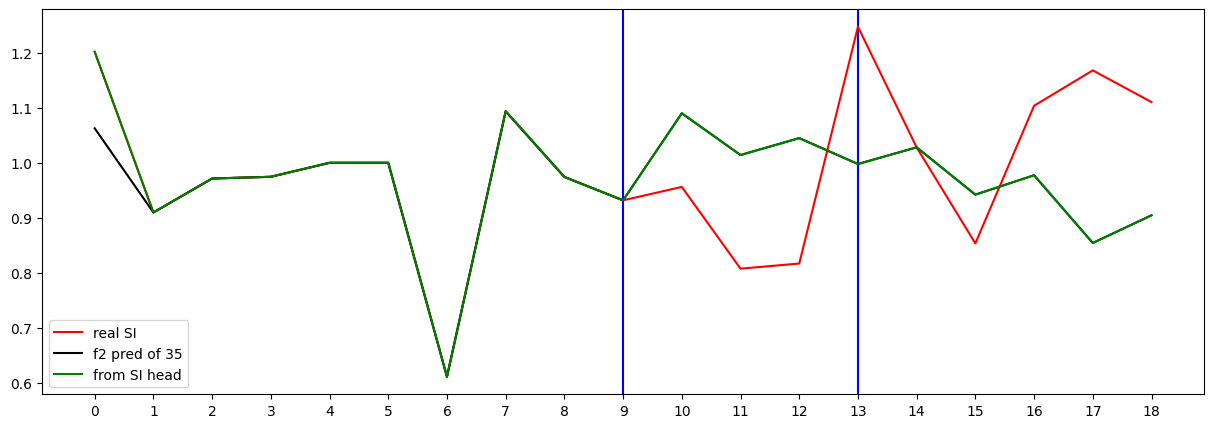

Testing R**2 - (all) - (no inputs):  0.997815862647332
Testing R**2 - (f2) - SI full (no inputs):  -0.7470325133257516
Testing R**2 - SI head only (no inputs):  -0.7470325133257516
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.2254257493820644
1 ...index R**2 (no inputs):  -0.6397582506877229
2 ...index R**2 (no inputs):  -0.7470325133257516
3 ...index R**2 (no inputs):  -43.16931613312827
4 ...index R**2 (no inputs):  -0.0036239896610417155
5 ...index R**2 (no inputs):  -0.24546263779271915
6 ...index R**2 (no inputs):  -504.0380121998057
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.273130
Loss_SI: 1.3859354257583618 Loss_all: 1.2664552927017212
===
[50] Train Loss: 0.400147
Loss_SI: 0.681446373462677 Loss_all: 0.3947567343711853
===


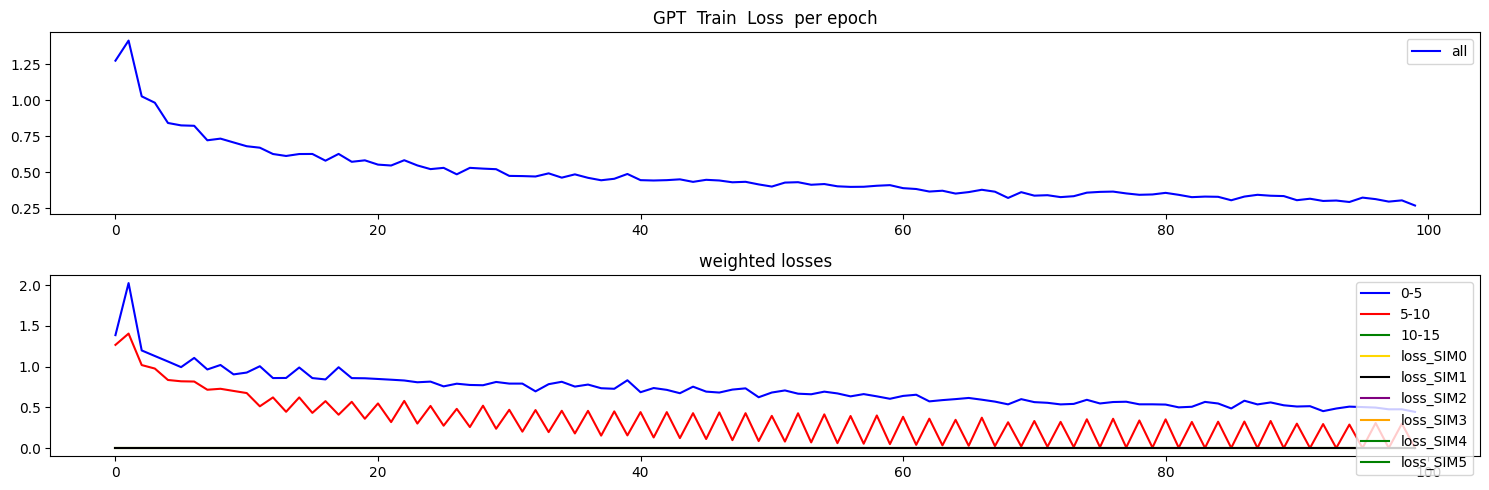

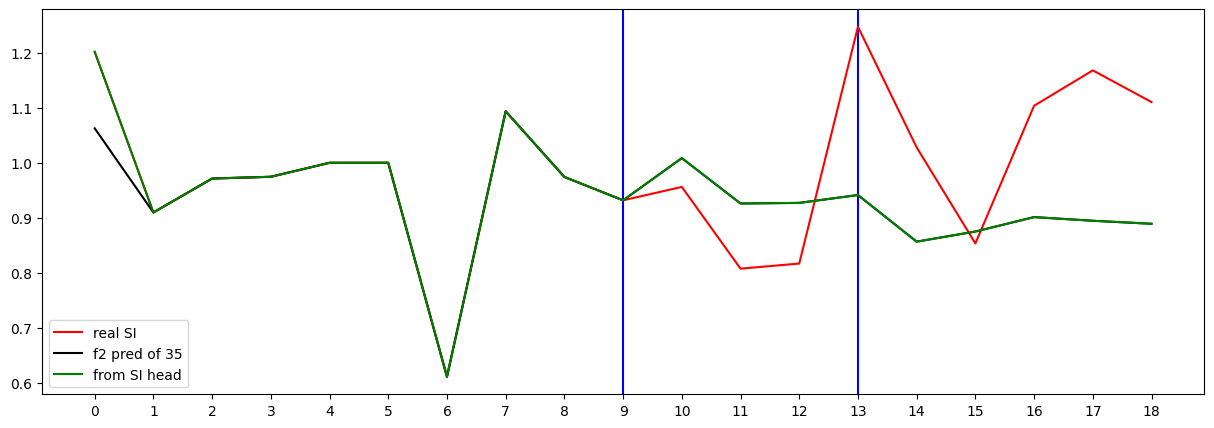

Testing R**2 - (all) - (no inputs):  0.9936734839063212
Testing R**2 - (f2) - SI full (no inputs):  -0.8437729304045125
Testing R**2 - SI head only (no inputs):  -0.8437729304045125
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.37245131860425307
1 ...index R**2 (no inputs):  -0.16357624349072997
2 ...index R**2 (no inputs):  -0.8437729304045125
3 ...index R**2 (no inputs):  -127.55647315346735
4 ...index R**2 (no inputs):  -1.1344199375446529
5 ...index R**2 (no inputs):  -2.6544090438970116
6 ...index R**2 (no inputs):  -44.881155459770156
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

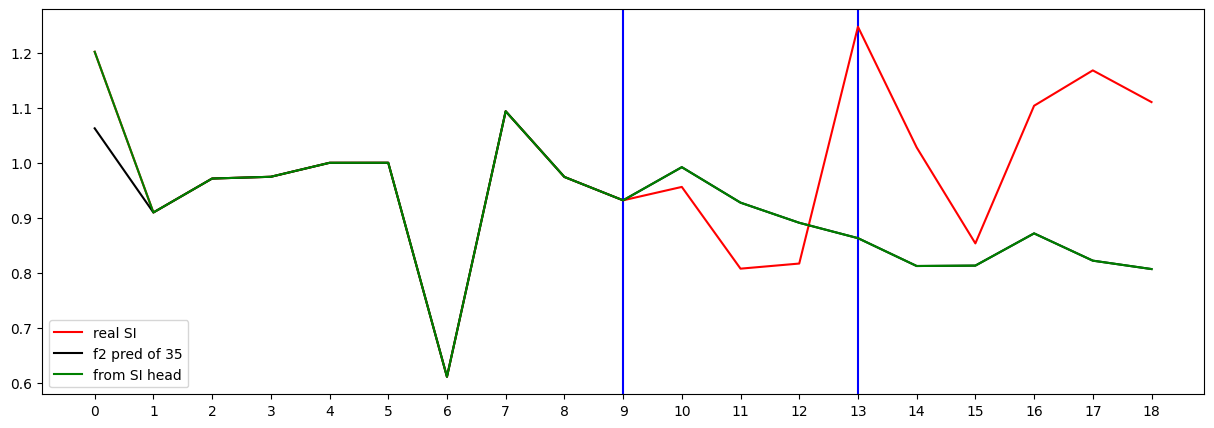

Testing R**2 - (all) - (no inputs):  0.9972188043251905
Testing R**2 - (f2) - SI full (no inputs):  -1.6303542425176332
Testing R**2 - SI head only (no inputs):  -1.6303542425176332
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  0.021950518559377574
1 ...index R**2 (no inputs):  -0.5179774406839492
2 ...index R**2 (no inputs):  -1.6303542425176332
3 ...index R**2 (no inputs):  -69.90151090873779
4 ...index R**2 (no inputs):  -1.2277646524002082
5 ...index R**2 (no inputs):  -0.5888936120756398
6 ...index R**2 (no inputs):  -247.0762976886845
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.237738
Loss_SI: 1.2361286878585815 Loss_all: 1.231264352798462
===
[50] Train Loss: 0.436699
Loss_SI: 0.5811623930931091 Loss_all: 0.43108293414115906
===


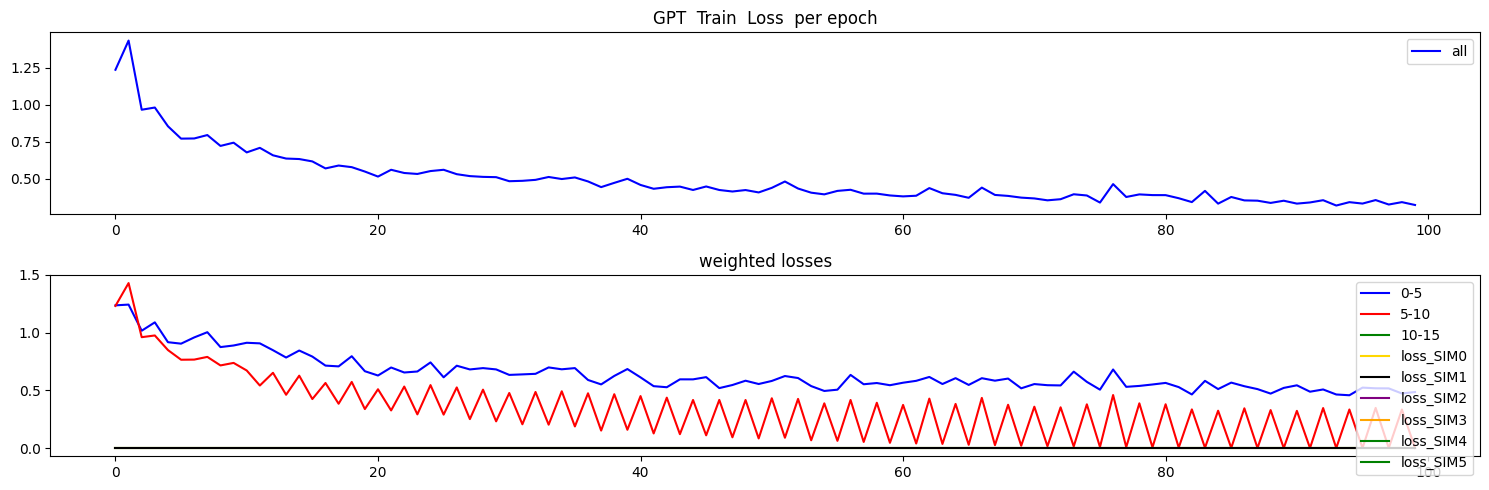

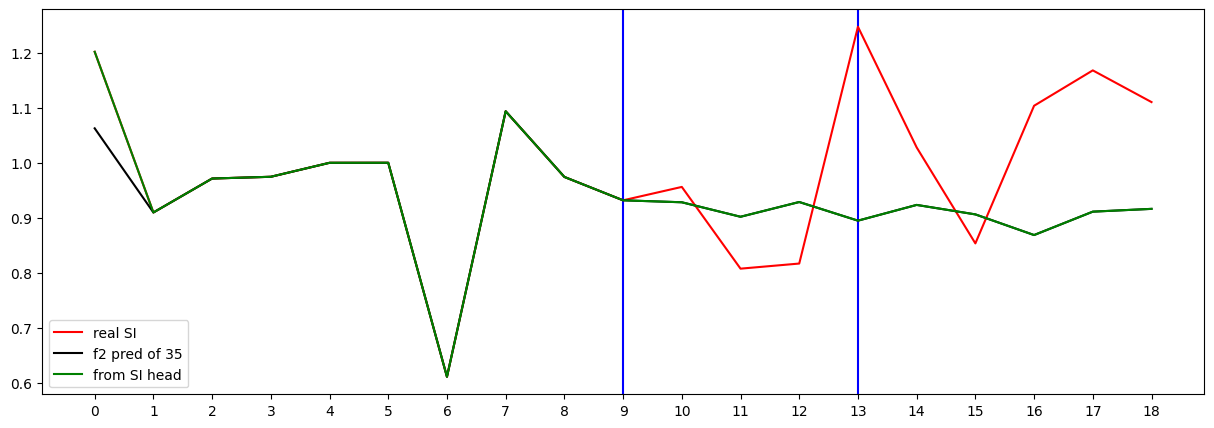

Testing R**2 - (all) - (no inputs):  0.9971355677912582
Testing R**2 - (f2) - SI full (no inputs):  -0.696641910045078
Testing R**2 - SI head only (no inputs):  -0.696641910045078
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.15806487577115225
1 ...index R**2 (no inputs):  -0.001044595999296627
2 ...index R**2 (no inputs):  -0.696641910045078
3 ...index R**2 (no inputs):  -21.597518848970562
4 ...index R**2 (no inputs):  -1.642599218188924
5 ...index R**2 (no inputs):  -0.6373772595957399
6 ...index R**2 (no inputs):  -853.3678076263399
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2

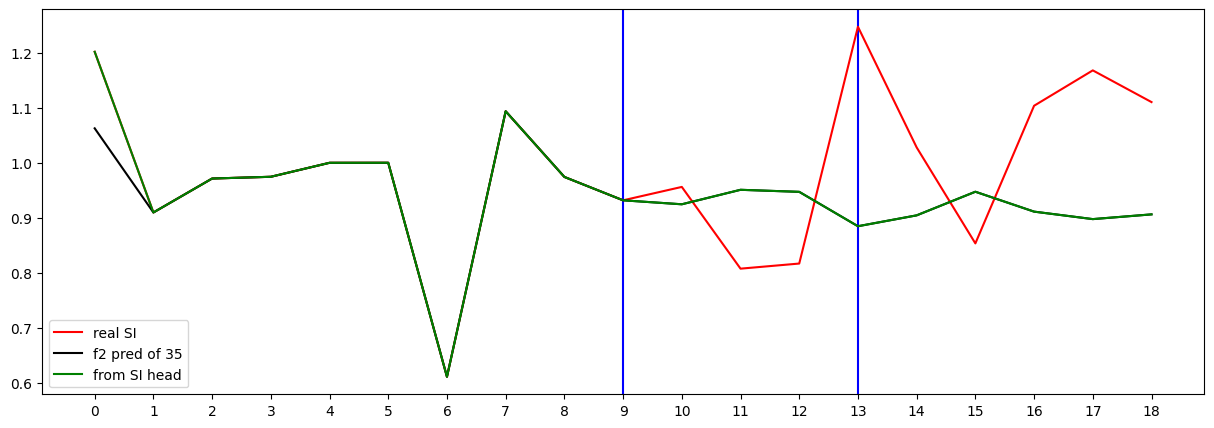

Testing R**2 - (all) - (no inputs):  0.997989572975333
Testing R**2 - (f2) - SI full (no inputs):  -0.5770090490027195
Testing R**2 - SI head only (no inputs):  -0.5770090490027195
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.21423031039680396
1 ...index R**2 (no inputs):  -0.08787054831340702
2 ...index R**2 (no inputs):  -0.5770090490027195
3 ...index R**2 (no inputs):  -17.84734568273644
4 ...index R**2 (no inputs):  -2.2445877300820554
5 ...index R**2 (no inputs):  -0.1277873642141969
6 ...index R**2 (no inputs):  -799.6912609800971
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.300506
Loss_SI: 1.3587385416030884 Loss_all: 1.2941378355026245
===
[50] Train Loss: 0.436105
Loss_SI: 0.6434938311576843 Loss_all: 0.43170687556266785
===


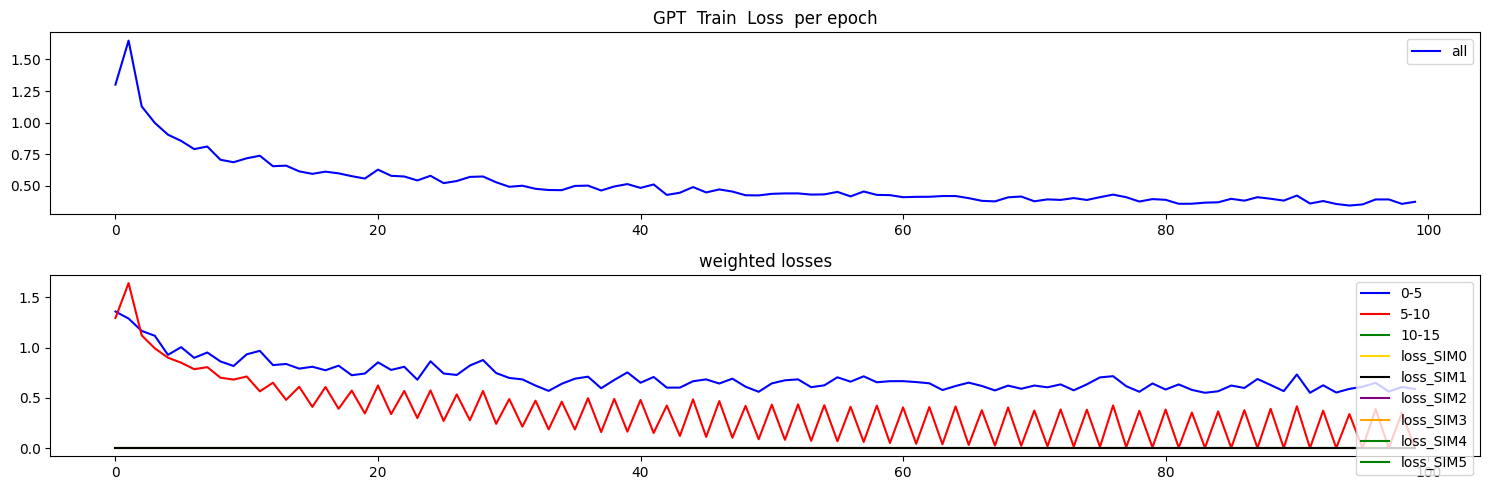

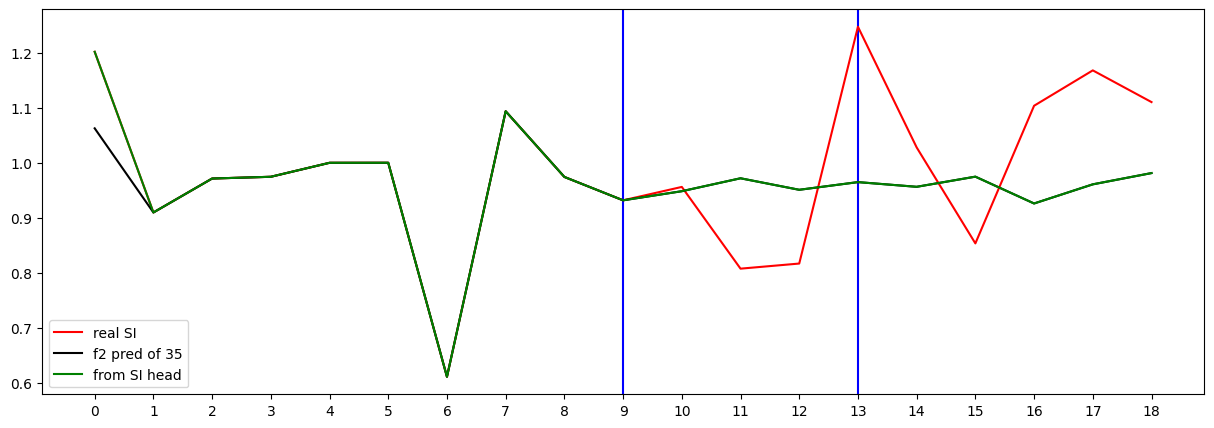

Testing R**2 - (all) - (no inputs):  0.9967428733603194
Testing R**2 - (f2) - SI full (no inputs):  -0.2535242631641823
Testing R**2 - SI head only (no inputs):  -0.2535242631641823
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  0.035913252015080555
1 ...index R**2 (no inputs):  0.24319684051876667
2 ...index R**2 (no inputs):  -0.2535242631641823
3 ...index R**2 (no inputs):  -211.3199227106372
4 ...index R**2 (no inputs):  -0.9312122778644303
5 ...index R**2 (no inputs):  -0.8645219655970646
6 ...index R**2 (no inputs):  -383.01415562078364
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R*

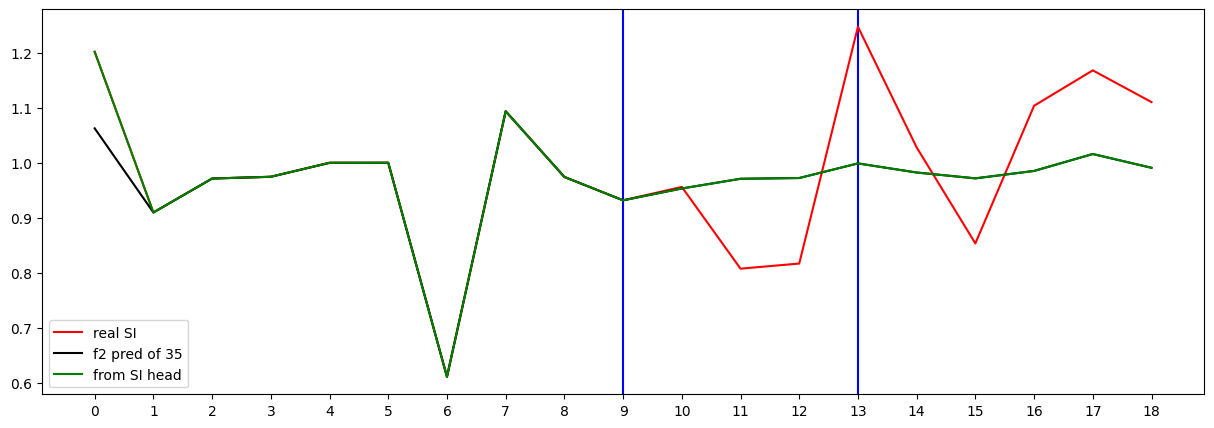

Testing R**2 - (all) - (no inputs):  0.9944860982929056
Testing R**2 - (f2) - SI full (no inputs):  -0.03870472892221155
Testing R**2 - SI head only (no inputs):  -0.03870472892221155
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.26602481529552535
1 ...index R**2 (no inputs):  0.08455077969218106
2 ...index R**2 (no inputs):  -0.03870472892221155
3 ...index R**2 (no inputs):  -41.7667555495561
4 ...index R**2 (no inputs):  -0.6983086796705091
5 ...index R**2 (no inputs):  -2.172952591407023
6 ...index R**2 (no inputs):  -508.8851759078449
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R*

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.244817
Loss_SI: 1.226998209953308 Loss_all: 1.2384895086288452
===
[50] Train Loss: 0.380801
Loss_SI: 0.5215598940849304 Loss_all: 0.37585508823394775
===


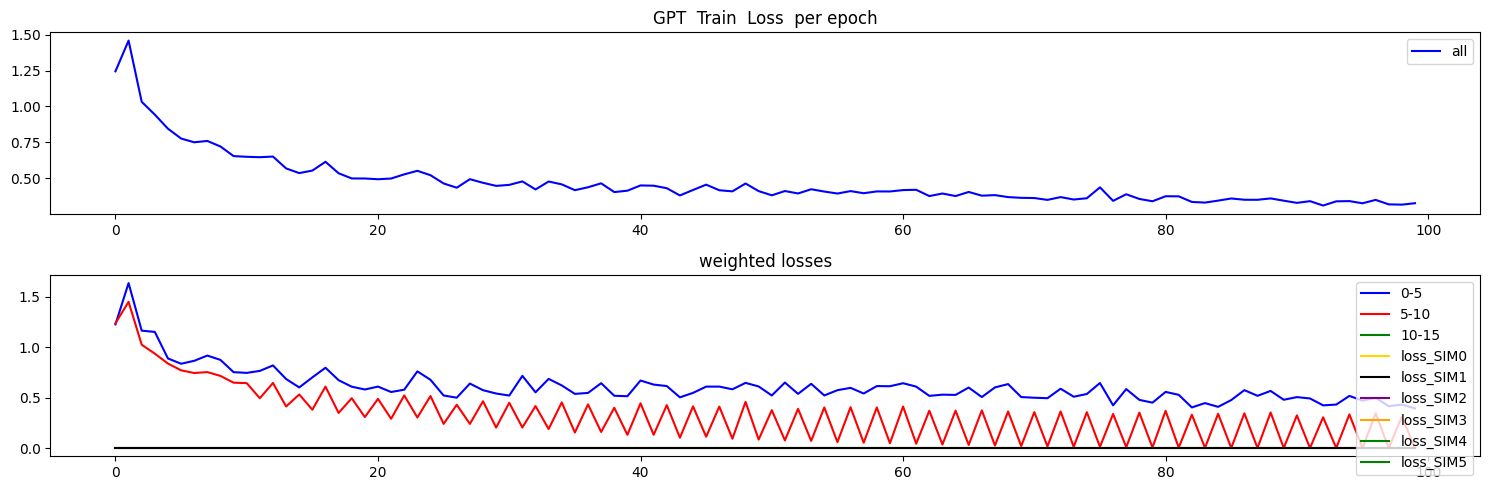

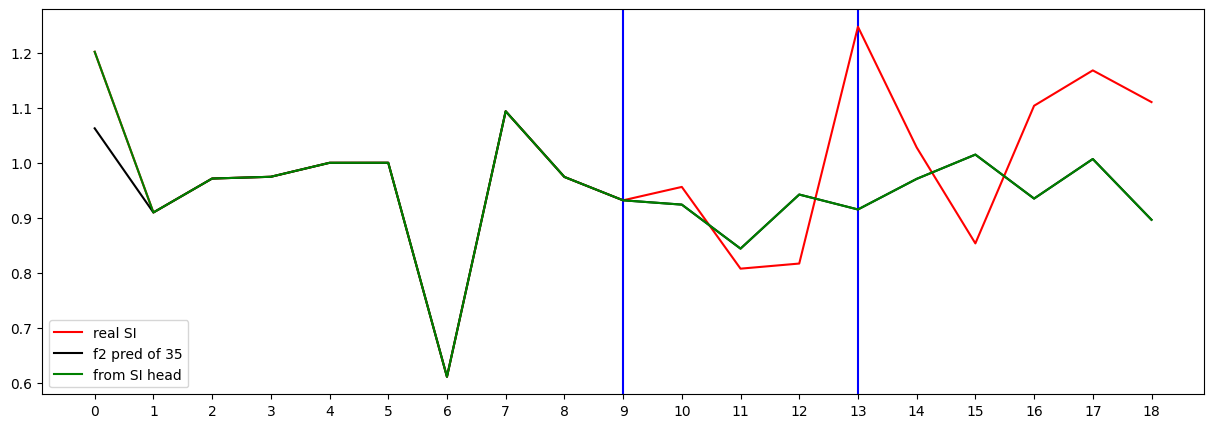

Testing R**2 - (all) - (no inputs):  0.9948858088396331
Testing R**2 - (f2) - SI full (no inputs):  -0.28598858913752556
Testing R**2 - SI head only (no inputs):  -0.28598858913752556
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  0.18246258572691254
1 ...index R**2 (no inputs):  -0.13562860436281254
2 ...index R**2 (no inputs):  -0.28598858913752556
3 ...index R**2 (no inputs):  -9.034612707230389
4 ...index R**2 (no inputs):  -47.68123490571442
5 ...index R**2 (no inputs):  -1.9016652222436479
6 ...index R**2 (no inputs):  -395.73942231548324
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

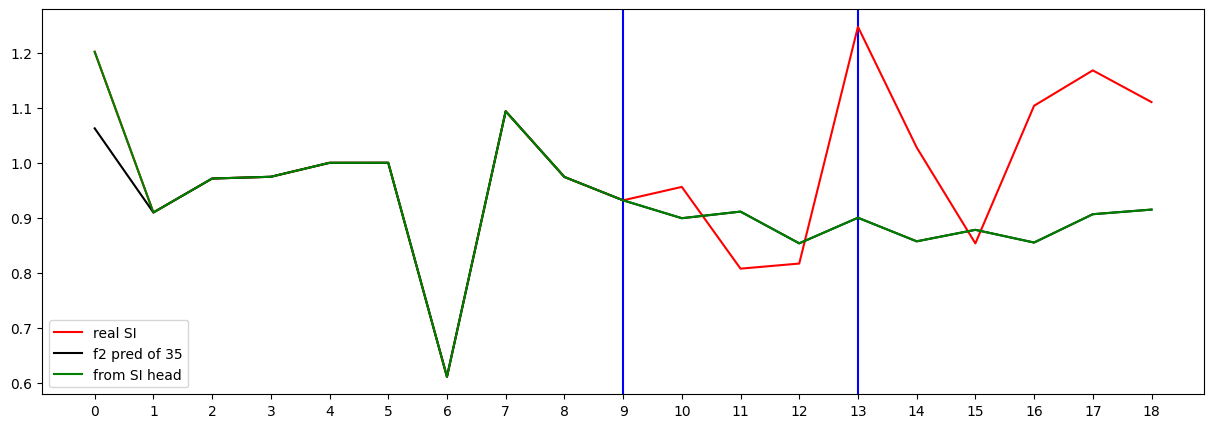

Testing R**2 - (all) - (no inputs):  0.9949845108698425
Testing R**2 - (f2) - SI full (no inputs):  -0.9780187569662506
Testing R**2 - SI head only (no inputs):  -0.9780187569662506
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -13.292197398522571
3 ...t step R**2 (no inputs):  -9.17069541280132
4 ...t step R**2 (no inputs):  -5.31522528970965
5 ...t step R**2 (no inputs):  -4.105849538891709
6 ...t step R**2 (no inputs):  -0.5785415320538714
7 ...t step R**2 (no inputs):  -1.9006517183641898
8 ...t step R**2 (no inputs):  -1.9757924592634395
0 ...index R**2 (no inputs):  -0.17134683104952453
1 ...index R**2 (no inputs):  0.08497420182280369
2 ...index R**2 (no inputs):  -0.9780187569662506
3 ...index R**2 (no inputs):  -2.9371174331275642
4 ...index R**2 (no inputs):  -60.65846587040386
5 ...index R**2 (no inputs):  -1.7530333319795983
6 ...index R**2 (no inputs):  -1054.5638291417592
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R*

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )




## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()

inferenceGPT_obj.DPO_print_ALL_R2s_THE_END()


====================================400to500
1 400to500...1.....................R² on first n steps - R²: -2.3843590174379776
Naive_R2:....................................R²: -1.2390
400to500..1Naive_R2:....................................R² -1.2389817237854004
RMSE:0.2559,MAE:0.2366,MASE:1.5853
1 400to500...1.......................R² on just step n - R²: -2.3843590174379776
Naive_R2:....................................R²: -1.2390
400to500..1Naive_R2:....................................R² -1.2389817237854004
RMSE:0.2559,MAE:0.2366,MASE:1.5853
2 400to500...2.....................R² on first n steps - R²: -1.4015412845725224
Naive_R2:....................................R²: -1.4002
400to500..2Naive_R2:....................................R² -1.400212287902832
RMSE:0.2352,MAE:0.2057,MASE:1.9615
2 400to500...2.......................R² on just step n - R²: -0.7418410036942138
Naive_R2:....................................R²: -0.0943
400to500..2Naive_R2:....................................R² -0.

In [50]:

summary = inferenceGPT_obj.summarize_eval_log()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


summary


Metric    Before  \
0    400to500...1.....................R² on first n steps - R²: -2.384359   
1    400to500..1Naive_R2:....................................R² -1.238982   
2                                         400to500..1...RMSE...  0.255892   
3                                          400to500..1...MAE...  0.236570   
4                                         400to500..1...MASE...  1.585259   
5    400to500...1.......................R² on just step n - R²: -2.384359   
6    400to500...2.....................R² on first n steps - R²: -1.401541   
7    400to500..2Naive_R2:....................................R² -0.747248   
8                                         400to500..2...RMSE...  0.223830   
9                                          400to500..2...MAE...  0.190303   
10                                        400to500..2...MASE...  1.451472   
11   400to500...2.......................R² on just step n - R²: -0.741841   
12   400to500...3.....................R² on first n steps - R²: -1.317891   
13   400to500..3Naive_R2:....................................R² -1.473542   
14                                        400to500..3...RMSE...  0.199360   
15                                         400to500..3...MAE...  0.182932   
16                                        400to500..3...MASE...  1.436771   
17   400to500...3.......................R² on just step n - R²: -2.653720   
18   400to500...4.....................R² on first n steps - R²: -1.368555   
19   400to500..4Naive_R2:....................................R² -0.067291   
20                                        400to500..4...RMSE...  0.208930   
21                                         400to500..4...MAE...  0.185947   
22                                        400to500..4...MASE...  0.966605   
23   400to500...4.......................R² on just step n - R²: -1.596253   
24   400to500...5.....................R² on first n steps - R²: -1.224876   
25   400to500..5Naive_R2:....................................R² -0.500986   
26                                        400to500..5...RMSE...  0.214743   
27                                         400to500..5...MAE...  0.204583   
28                                        400to500..5...MASE...  1.165007   
29   400to500...5.......................R² on just step n - R²: -3.608552   
30   400to500...6.....................R² on first n steps - R²: -0.806964   
31   400to500..6Naive_R2:....................................R² -0.050579   
32                                        400to500..6...RMSE...  0.175662   
33                                         400to500..6...MAE...  0.162486   
34                                        400to500..6...MASE...  1.046985   
35   400to500...6.......................R² on just step n - R²:  0.027971   
36   400to500...7.....................R² on first n steps - R²: -0.520299   
37   400to500..7Naive_R2:....................................R²  0.187345   
38                                        400to500..7...RMSE...  0.148543   
39                                         400to500..7...MAE...  0.132180   
40                                        400to500..7...MASE...  0.798630   
41   400to500...7.......................R² on just step n - R²:  0.648453   
42   400to500...8.....................R² on first n steps - R²: -0.470219   
43   400to500..8Naive_R2:....................................R²  0.095904   
44                                        400to500..8...RMSE...  0.128461   
45                                         400to500..8...MAE...  0.114340   
46                                        400to500..8...MASE...  0.864359   
47   400to500...8.......................R² on just step n - R²:  0.429007   
48   400to500...9.....................R² on first n steps - R²: -0.443172   
49   400to500..9Naive_R2:....................................R² -0.323395   
50                                        400to500..9...RMSE...  0.165442   
51                                         400to500..

In [51]:

df = summary

# Assuming your DataFrame is called `df` and has a column named "Better"
total_rows = len(df)
after_wins = (df["Better"] == "After").sum()

percent_after = 100 * after_wins / total_rows

print(f"✅ 'After' was better in {after_wins} out of {total_rows} rows.")
print(f"📊 That’s {percent_after:.2f}% of the metrics.")



✅ 'After' was better in 139 out of 270 rows.
📊 That’s 51.48% of the metrics.
